# Исследование эффективности приложения Procrastinate Pro+
## Цель исследования

Необходимо выявить причины убытков приложения. Для этого необходимо изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов,
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.


## План исслодования
### Описание данных

Исходные файлы:
* visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, 
* orders_info_short.csv — информацию о заказах,
* costs_info_short.csv — информацию о расходах на рекламу.

**Структура visits_info_short.csv:**

* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

**Структура orders_info_short.csv:**

* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

**Структура costs_info_short.csv:**

* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.


### Шаг 1. Предобработка данных

Проверка форматов данных, поиск пропусков и дубликатов. Выводы.

### Шаг 2. Написание функций для расчёта и анализа LTV, ROI, удержания и конверсии и их визуализации

Функции для вычисления значений метрик:

* get_profiles() — для создания профилей пользователей,
* get_retention() — для подсчёта Retention Rate,
* get_conversion() — для подсчёта конверсии,
* get_ltv() — для подсчёта LTV.

А также функции для построения графиков:

* filter_data() — для сглаживания данных,
* plot_retention() — для построения графика Retention Rate,
* plot_conversion() — для построения графика конверсии,
* plot_ltv_roi — для визуализации LTV и ROI.


### Шаг 3. Исследовательский анализ данных

1. Составление профилей пользователей.
2. Определение минимальной и максимальной даты привлечения пользователей.
3. Выявление из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построение таблицы, отражающей количество пользователей и долю платящих из каждой страны.
4. Выявление какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построение таблицы, отражающей количество пользователей и долю платящих для каждого устройства.
5. Изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей. Построение таблицы, отражающей количество пользователей и долю платящих для каждого канала привлечения.
6. Выводы.    

### Шаг 4. Маркетинг

1. Подсчет общей суммы расходов на маркетинг.
2. Выявление как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
3. Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику (на одном графике).
4. Выявление сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, используя профили пользователей.
5. Выводы.
  
### Шаг 5. Оценка окупаемости рекламы

1. Используя графики LTV, ROI и CAC, анализ окупаемости рекламы. Условия: на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Определить необходимость включения в анализ органических пользователей.
2. Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
3. Проверка конверсии пользователей и динамику её изменения. То же самое с удержанием пользователей. Построение и изучение графиков конверсии и удержания.
4. Анализ окупаемости рекламы с разбивкой по устройствам. Построение графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
5. Анализ окупаемости рекламы с разбивкой по странам. Построение графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
6. Анализ окупаемости рекламы с разбивкой по рекламным каналам. Построение графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
7. Выводы.

## Шаг 1. Предобработка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

try: 
    visits = pd.read_csv('visits_info_short.csv') 
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
except: 
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv') 


In [2]:
pd.options.mode.chained_assignment = None

In [3]:
#функция для предобработки данных
def pred (df):
    print('HEAD')
    print(df.head())
    print('*'*50)
    print('INFO')
    print(df.info())
    print('*'*50)
    print('ПРОПУСКИ')
    print(df.isna().sum())
    print('*'*50)
    print('ПОЛНЫЕ ДУБЛИКАТЫ')
    print(df.duplicated().sum())
    print('*'*50)
    print('DESCRIBE')
    print(df.describe())    


In [4]:
df = visits
pred(df)

HEAD
        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
**************************************************
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        

In [5]:
#переименование столбцов: приведение к нижнему регистру и "змеиной" записи
visits = visits.rename(columns = {'User Id': 'id', 'Session Start': 'session_start', 'Session End': 'session_end'})
visits.columns = map(str.lower, visits.columns)

In [6]:
#преобразование форматов 
visits['id'] = visits['id'].astype('category')
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             309901 non-null  category      
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), object(3)
memory usage: 18.2+ MB


In [7]:
#проверка данных о начале и конце сессии
visits['session_duration'] = (visits['session_end'] - visits['session_start']).dt.seconds
visits.query('session_duration <= 0')['session_duration'].sum()

0

In [8]:
visits[['session_start', 'session_end']].min()

session_start   2019-05-01 00:00:41
session_end     2019-05-01 00:07:06
dtype: datetime64[ns]

In [9]:
visits[['session_start', 'session_end']].max()

session_start   2019-10-31 23:59:23
session_end     2019-11-01 01:38:46
dtype: datetime64[ns]

In [10]:
#проверка на неявные дубликаты
for i in ['region', 'device', 'channel']:
    print(visits[i].value_counts())
    print('*'*50)

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64
**************************************************
iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64
**************************************************
organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64
**************************************************


In [11]:
df = orders
pred(df)

HEAD
        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
**************************************************
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
**************************************************
ПРОПУСКИ
User Id     0
Event Dt    0
Revenue     0
dtype: int64
**************************************************
ПОЛНЫЕ ДУБЛИКАТЫ
0
**************************************************
DESCRIBE
            User Id       Revenue
count  4.021

In [12]:
#переименование столбцов: приведение к нижнему регистру и "змеиной" записи
orders = orders.rename(columns = {'User Id': 'id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'})

In [13]:
#преобразование форматов
orders['id'] = orders['id'].astype('category')
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        40212 non-null  category      
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 1.0 MB


In [14]:
#проверка дат
print('начальная дата', orders['event_dt'].min())
print('конечная дата', orders['event_dt'].max())

начальная дата 2019-05-01 00:28:11
конечная дата 2019-10-31 23:56:56


In [15]:
df = costs
pred(df)

HEAD
           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
**************************************************
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
**************************************************
ПРОПУСКИ
dt         0
Channel    0
costs      0
dtype: int64
**************************************************
ПОЛНЫЕ ДУБЛИКАТЫ
0
**************************************************
DESCRIBE
             costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max  

In [16]:
#приведение названий колонок к нижнему регистру
costs.columns = map(str.lower, costs.columns)

In [17]:
#преобразование форматов
costs['dt'] = pd.to_datetime(costs['dt'])

In [18]:
#проверка дат
print('начальная дата', costs['dt'].min())
print('конечная дата', costs['dt'].max())
last_first_ds = costs['dt'].max() #последняя дата первого касания с сервисом

начальная дата 2019-05-01 00:00:00
конечная дата 2019-10-27 00:00:00


*отличается от предыдущих отчетов: последние данные начало 27-ого октября, а не 31. Отсутствует информация за последние 5 дней относительно предыдущих таблиц. В дальнейшем необходимо исключить из исследования пользователей, привлеченных после этой даты.*

In [19]:
#проверка каналов на неявные дубликаты
costs['channel'].value_counts()

WahooNetBanner        180
RocketSuperAds        180
AdNonSense            180
TipTop                180
FaceBoom              180
lambdaMediaAds        180
LeapBob               180
OppleCreativeMedia    180
YRabbit               180
MediaTornado          180
Name: channel, dtype: int64

In [20]:
#проверка преобразований
for df in [visits, orders, costs]:
    print('df')
    print(df.info())
    print('*'*50)


df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                309901 non-null  category      
 1   region            309901 non-null  object        
 2   device            309901 non-null  object        
 3   channel           309901 non-null  object        
 4   session_start     309901 non-null  datetime64[ns]
 5   session_end       309901 non-null  datetime64[ns]
 6   session_duration  309901 non-null  int64         
dtypes: category(1), datetime64[ns](2), int64(1), object(3)
memory usage: 20.5+ MB
None
**************************************************
df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        40212 non-null  category      
 1  

### Выводы
Были импортированы и проверены исходные файлы:
* visits_info_short.csv хранит лог сервера с информацией о посещениях сайта,
* orders_info_short.csv — информацию о заказах,
* costs_info_short.csv — информацию о расходах на рекламу.

**visits_info_short.csv**

Таблица содержит данные о 309901 сессии с 1 мая по 31 октября 2019г пользователей из США, Великобритании, Франции и Германии.
Устройства пользователей: iPhone, Android, Mac, PC.

Каналы привлечения: поисковый трафик и 9 рекламных систем(TipTop, FaceBoom, WahooNetBanner, LeapBob, OppleCreativeMedia, RocketSuperAds, MediaTornado, YRabbit, AdNonSense, lambdaMediaAds).

Пропусков и дубликатов нет, момент окончания сессии везде позже её начала - аномалий нет.

Применены преобразования:
1. названия колонок к нижнему регистру и "змеиной записи". 
2. изменены форматы:
    * id пользователя - category
    * начало и конец сессии(session_start, session_end) - datetime64[ns]

**orders_info_short.csv**

Таблица содержит данные о 40212 заказах за период, аналогичный предыдущей таблицы. Сумма выручки с одного заказа составляет от 4.99 USD до 49.99 USD. 

Полных дубликатов и пропусков нет.

Применены преобразования:
1. названия колонок к нижнему регистру и "змеиной записи". 
2. изменены форматы:
    * id пользователя - category
    * дата заказа(event_dt) - datetime64[ns]

**costs_info_short.csv**

В таблице приеведены данные о 1800 временных отрезках с 1 мая по 27 октября. Это отличается от предыдущих отчетов: последние данные начало 27-ого октября, а не 31. Отсутствует информация за последние 5 дней относительно предыдущих таблиц. В дальнейшем необходимо исключить из исследования пользователей, привлеченных после этой даты.

Полных дубликатов и пропусков нет.

Применены преобразования:
1. названия колонок к нижнему регистру. 
2. изменён формат даты списания средств на рекламу(dt) - datetime64[ns]


## Шаг 2. Написание функций для расчёта и анализа LTV, ROI, удержания и конверсии и их визуализации

### Функция для получения пользовательских профилей

In [21]:
def get_profiles(visits, orders, costs):
    profiles = (
        visits.sort_values(by=['id', 'session_start'])
        .groupby('id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['id'].isin(orders['id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'id': 'nunique'})
        .rename(columns={'id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    costs['dt'] = pd.to_datetime(costs['dt']).dt.date #преобразование в дату для объединения
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
    
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles



### Функция для расчёта удержания

In [22]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['id', 'session_start']], on='id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'id': 'nunique'})
            .rename(columns={'id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчёта конверсии

In [23]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['id', 'event_dt'])
        .groupby('id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['id', 'event_dt']], on='id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'id': 'nunique'})
            .rename(columns={'id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


### Функция для расчёта LTV и ROI

In [24]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['id', 'event_dt', 'revenue']], on='id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'id': 'nunique'})
            .rename(columns={'id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания фрейма

In [25]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция для визуализации удержания

In [26]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии

In [27]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [28]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Шаг 3. Исследовательский анализ данных

In [29]:
#создание профиелй пользователей
profiles = get_profiles(visits, orders, costs)
profiles = profiles.query('first_ts <= @last_first_ds') #убираем данные о пользователях, привлеченных после 26 октября
profiles

id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt      month  payer  acquisition_cost  
0       2019-05-07 2019-05-01   True          1.088172  
1       2019-07-09 2019-07-01  False          1.107237  
2       2019-10-01 2019-10-01  False          0.000000  
3       2019-08-22 2019-08-01  False          0.988235  
4       2019-10-02 2019-10-01  False          0.230769  
...            ...        ...    ...               ...  
150003  2019-09-28 2019-09-01  False          3.500000  
150004  2019-10-21 2019-10-01  False          0.000000  
150005  2019-07-23 2019-07-01  False          2.600000  
150006  2019-09-28 2019-09-01  False          0.205714  
150007  2019-10-18 2019-10-01  False          0.000000  

[148921 rows x 9 columns]

In [30]:
#минимальная и максимальная даты привелечения
print('минимальная дата привелечения', profiles['first_ts'].min())
print('максимальная дата привелечения', profiles['first_ts'].max())

минимальная дата привелечения 2019-05-01 00:00:41
максимальная дата привелечения 2019-10-26 23:58:10


In [31]:
#таблицы расчета конверсий в покупку пользователей по регионам, устройствам и каналам привлечения
for i in ['region', 'device', 'channel']:
    profiles_id = profiles.groupby(i).agg({'id': 'nunique', 'payer': 'sum'})
    profiles_id['cr'] = (profiles_id['payer'] / profiles_id['id']).round(3)
    profiles_id = profiles_id.drop(['payer'], axis=1)
    profiles_id = profiles_id.rename(columns={'id': 'num_users'})    
    print(i, 'convertion')
    print(profiles_id.sort_values('cr', ascending=False))
    print('*'*50)

region convertion
               num_users     cr
region                         
United States      99283  0.069
Germany            14876  0.041
UK                 17436  0.040
France             17326  0.038
**************************************************
device convertion
         num_users     cr
device                   
Mac          29862  0.064
iPhone       54058  0.062
Android      34769  0.059
PC           30232  0.050
**************************************************
channel convertion
                    num_users     cr
channel                             
FaceBoom                28937  0.122
AdNonSense               3845  0.112
lambdaMediaAds           2130  0.106
TipTop                  19391  0.096
RocketSuperAds           4413  0.080
WahooNetBanner           8486  0.053
YRabbit                  4268  0.038
MediaTornado             4343  0.036
LeapBob                  8495  0.031
OppleCreativeMedia       8536  0.027
organic                 56077  0.021
**************

In [32]:
# доля плательщиков по регионам
profiles.groupby('region')['payer'].mean()

region
France           0.037804
Germany          0.041140
UK               0.039860
United States    0.069015
Name: payer, dtype: float64

**Выводы**

Для исследования используются данные о пользователях, привлеченных с 1 мая по 26 октября 2019г включительно.

Рассчет общей конверсии в покупку показал следующие результаты:
1. Наибольшая конверсия в США - 6,9%; наименьшая во Франции - 3,7%. Отметим, что пользователей из США практически в 5 раз больше, чем в любой другой стране.
2. Наибольшая конверсия с утройств Mac и iPhone - 6,2% и 6,3%; наименьшая у PC и Android - 5% и 5,8%. Количество пользователей распределено равномернее: по 30-35 тыс. PC, Android и Mac, с отрывом iPhone c 54 тыс. пользователей.
3. Наибольшая конверсия у палатного канала FaceBoom - 12%, наименьшая у органического поиска - 2%. Лидерами по привелечению пользователей являются органический поиск(56 тыс.) и 2 платных канала: FaceBoom (29 тыс.) и TipTop(19 тыс.), остальные рекламные каналы привлекли не более 9 тыс. каждый. Низкая конверсия органики обусловлена отсутствием какой либо оптимизации на привлечение платящих пользователей.

### Шаг 4. Маркетинг

In [33]:
#общая сумма расходов на маркетинг
print('Суммарный расход на маркетинг', costs['costs'].sum().round(2), 'USD')

Суммарный расход на маркетинг 105497.3 USD


In [34]:
#затраты по источникам
costs.groupby('channel').agg({'costs': 'sum'}).sort_values('costs', ascending=False)

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

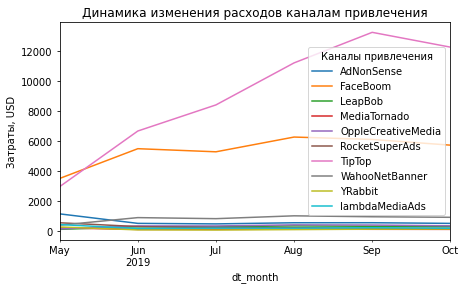

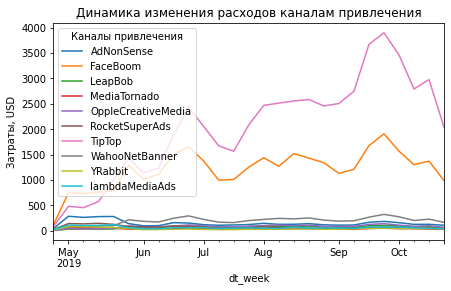

In [35]:
costs['dt_week'] = pd.to_datetime(costs['dt']).astype('datetime64[W]')
costs['dt_month'] = pd.to_datetime(costs['dt']).astype('datetime64[M]')

for i in ['dt_month', 'dt_week']:
    costs_channel = costs.pivot_table(index=i, columns='channel', values='costs', aggfunc='sum')
    costs_channel.plot(figsize=(7, 4),
                      ylabel='Затраты, USD',
                      title='Динамика изменения расходов каналам привлечения')
    plt.legend(title='Каналы привлечения')

In [36]:
#стоимость привлечения одного пользователя по каналам
users_channel = profiles.groupby('channel').agg({'id': 'nunique', 'acquisition_cost': 'sum'})
users_channel = users_channel.rename({'id': 'users_num'}, axis=1)
users_channel['cac'] = users_channel['acquisition_cost'] / users_channel['users_num']
users_channel.sort_values('cac', ascending=False)

users_num  acquisition_cost       cac
channel                                                  
TipTop                  19391         54163.300  2.793219
FaceBoom                28937         32212.400  1.113191
AdNonSense               3845          3875.550  1.007945
lambdaMediaAds           2130          1545.600  0.725634
WahooNetBanner           8486          5109.000  0.602050
RocketSuperAds           4413          1822.925  0.413081
OppleCreativeMedia       8536          2133.500  0.249941
MediaTornado             4343           949.920  0.218724
YRabbit                  4268           933.150  0.218639
LeapBob                  8495          1784.790  0.210099
organic                 56077             0.000  0.000000

**Выводы**

Общая сумма расходов на маркетинг составила 105497.3 USD

Больше всего было потрачено на TipTop и FaceBoom: 55 тыс. USD и 32 тыс. USD. Траты на остальные каналы составили от 0.9 до 5 тыс. USD.

Помесячная динамика демонстрирует, что затраты наиболее дорогого канала TipTop росли на протяжении практически всего исследовательского периода, снижение видно только на последнем месяце. Уровень максимально месячного расхода Faceboom практически достигает за первый месяц, далее виден небольшой рост в середине периода, в целом динамика пологая. Изменение трат на остальные каналы в абсолютных суммах не так существенны, динамика в целом также пологая. Отметим: очевидно за первый месяц был снижен бюджет на AdNonSense и увеличен на RocketSuperAds.

На понедельной разбивке видны 2 пика по каналам TipTop и FaceBoom в конце июня и конце сентября. Данные пики также заметны на остальных каналах, однако их абсолютное выражение значительно меньше.

Самая высокая стоимость привелечения у канала TipTop: 2,79 USD, что в 2,5 раза превышает стоимость привлечения по второму по дороговизне каналу FaceBoom: 1,11 USD. Третий по стоимости привлечения канал - AdNonSense: 1,01 USD. Стоимость привлечения одного пользователя составляет от 0,72 до 0,21 USD.

## Шаг 5. Оценка окупаемости рекламы

In [37]:
#yстановка момента и горизонт анализа данных.
observation_date = datetime(2019, 11, 1).date()  # момент анализа по условию задачи
horizon_days = 14  # горизонт анализа, максимальный предполагаемый срок окупаемости рекламы

In [38]:
#исключение бесплатных пользователей
paid_profiles = profiles.query('channel != "organic"')

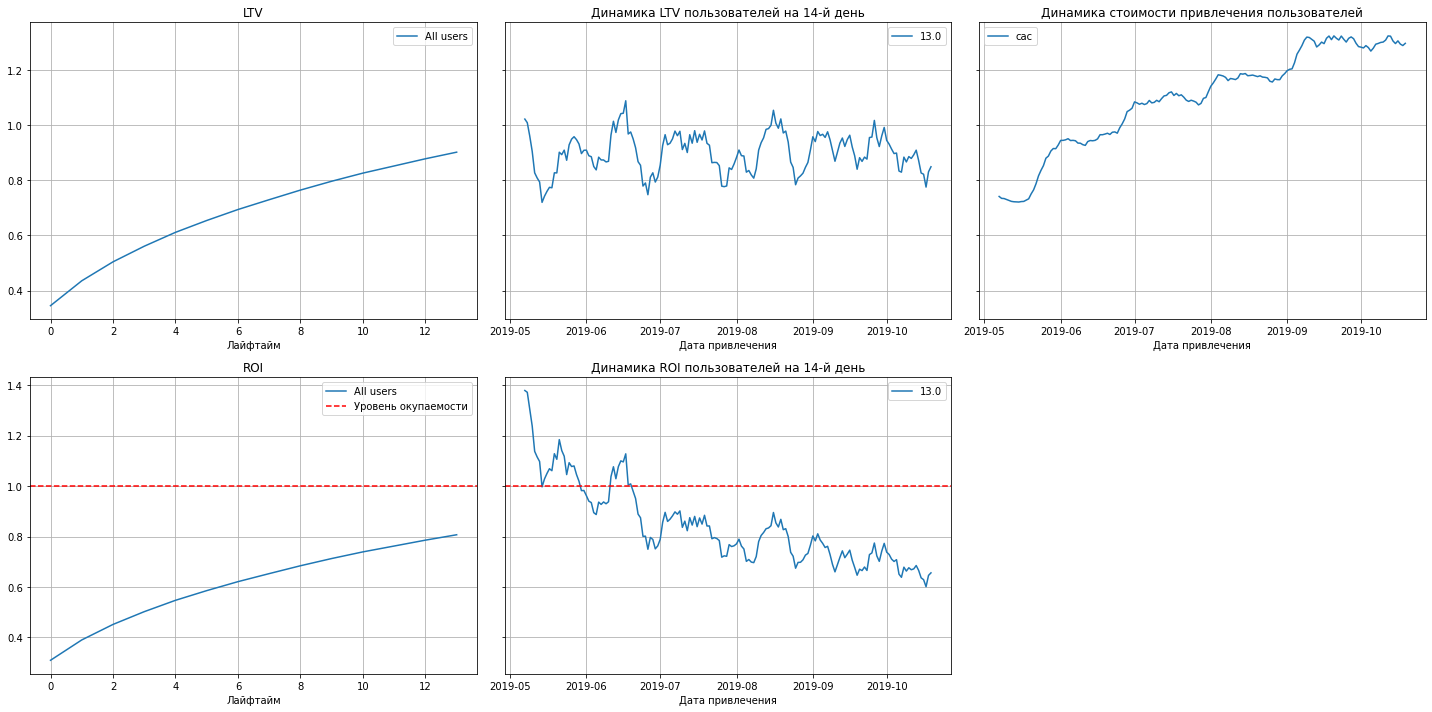

In [39]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


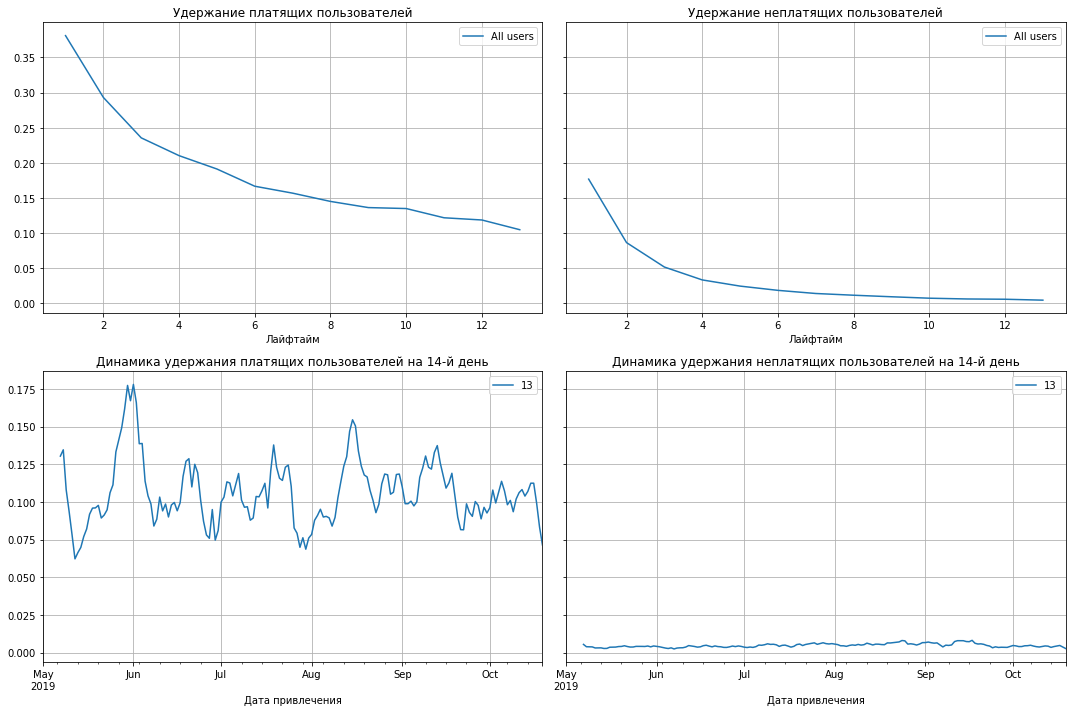

In [40]:
#таблицы удержания
retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

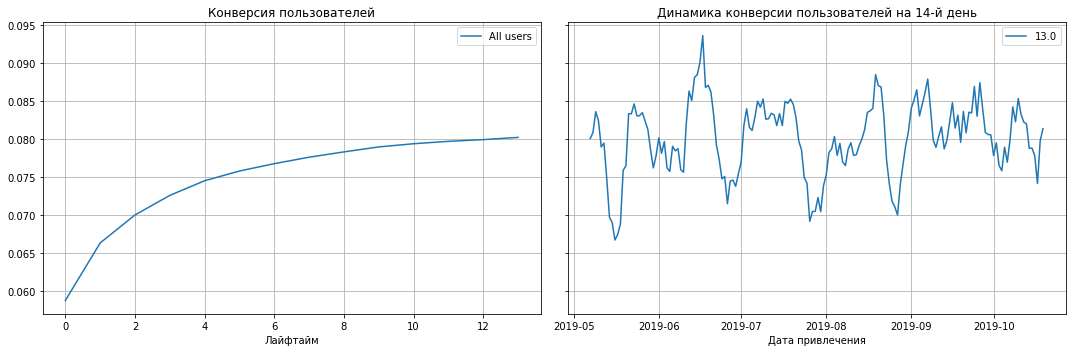

In [41]:
#таблицы конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Выводы**

Из графика ROI видно, что:
* реклама за весь исследуемый промежуток времени не окупается за планируемый горизонт. 
* Максимальный показатель ROI 0,8 к концу 2-х недельного периода.

В разбивке ROI на когорты по дате привления:
* окупились когорты мая и частично июня. 
* ROI падает пропорционально росту CAC.

Показатель динамики удержания пользователей:
* колеблется в пределах когорт одного месяца, но в целом стабилен в диапазоне от 0,8 до 1,1. 
* В когортах за последние 2 меясца разброс уменьшается.
* Сезонность или другие факторы, влияюшие на привлечение пользователей в конкретный период времени,  судя по графику, отсутствует.

Динамика стоимости привлечения 1 пользователя (CAC):
* растёт для пользователей, привлеченных в период с середины мая по первую неделю сентября.
* Небольшой спад заметен для привлеченных в первые 2 недели мая.
* Для когорт привлечения со второй недели сентября по конец октября стабилен на высоком уровне.

Плятящие пользователи удерживаются лучше неплатящих.

Конверсия пользователей на протяжении лайфтайма растёт от 0,5% в первый день до 0,8% на 14 день. Конверсия по временным когортам показывает колебания в пределах одного месяца, но в целом на протяжении всего периода в среднем составляет 0,8% на 14 день, что соответствует общему ROI. 

Стабильность LTV и рост CAC, может говорить о росте конкуренции на канале или увеличением бюджета по каналу.

### Окупаемость с разбивкой по странам

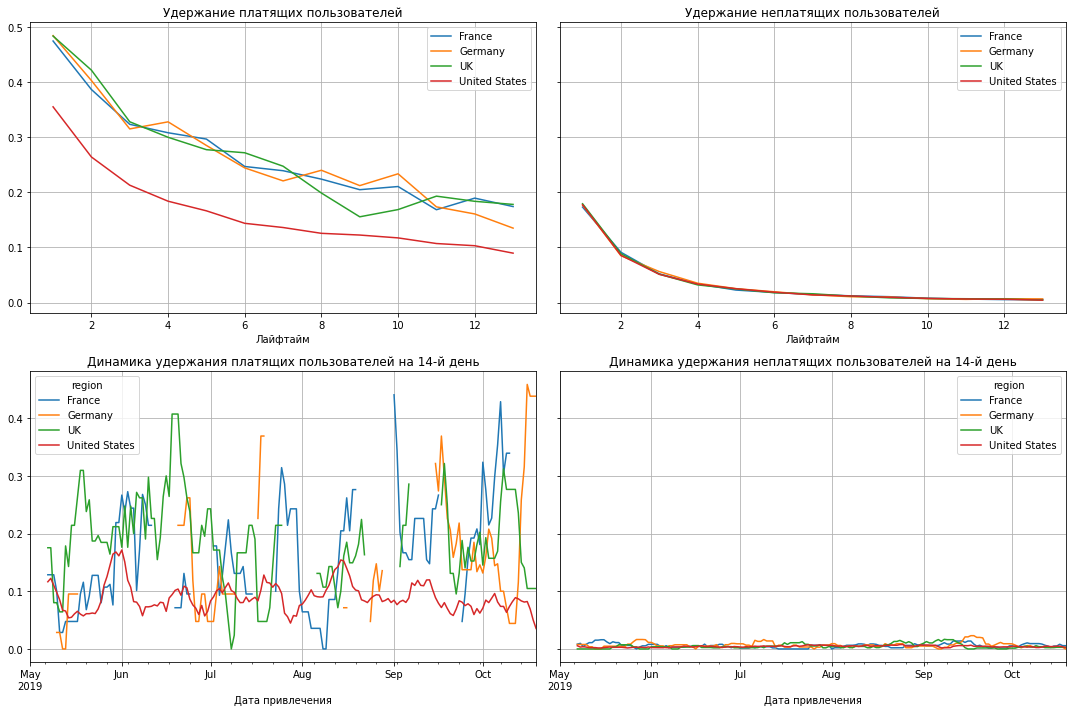

In [42]:
#таблицы удержания с разбивкой по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод**

На графиках удержания видно:
* Платящие пользователи США удерживаются хуже, чем в остальных странах.
* LTV во Франции, Германии и Великобритании не так равномерно, как в США.
* Удержание неплатящих пользователей во всех странах одинаковое.

В динамике удержания:
* Разброс LTV по временным когортам в США более равномерный, разброс порядка 0,1.
* Во Франции, Германии и Великобритании средний уровень выше, однако присутствуют большие колебания и разрывы по каждой из стран.
* Удержание неплатящих пользователей в динамике во всех странах также практически одинаковое, с небольшими всплесками все кривые в районе 0.
        
Разрывы в динамике удержания связаны с тем, что в отдельных когортах нет пользователей, проживших весь лайфтайм. Причиной может быть плохое удержание либо остановки рекламы.  

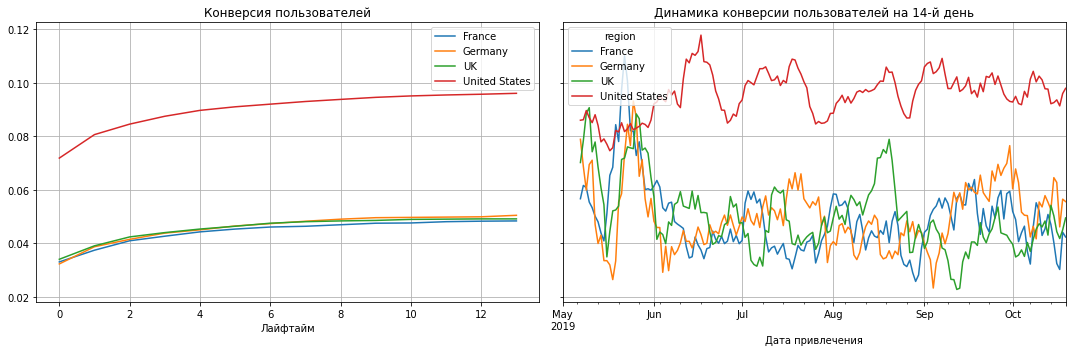

In [43]:
#таблицы конверсии с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод**

На графиках конверсии видно:
* Конверсия США существенно выше, чем в остальных старнах: ~0,7 на 1 день удержания и ~0,95 на 14 день.
* Конверсия во Франции, Германии и Великобритании ~0,35 на 1 день удержания и ~0,5 на 14 день.

В динамике конверсии:
* Конверсия США майских когорт минимальна, в июне максимальный всплеск, далее разброс сужается.
* Кривые по Франции, Германии и Великобритании не синхронны в динамике, однако относительно США они составляют общую группу.
* Во Франции, Германии и Великобритании разброс значительно шире. Самые резкие колебания в майских когортах: 1 и второй по величене взлёты и глубокий минимум. Далее разброс снижается. Общий вектор имеет всплеск в сентябре. Конверсия октябрьских когорт стабилизируется в районе досентябрьского среднего положения.
    
Динамика конверсии US становится с течением времени не такой волатильной.    


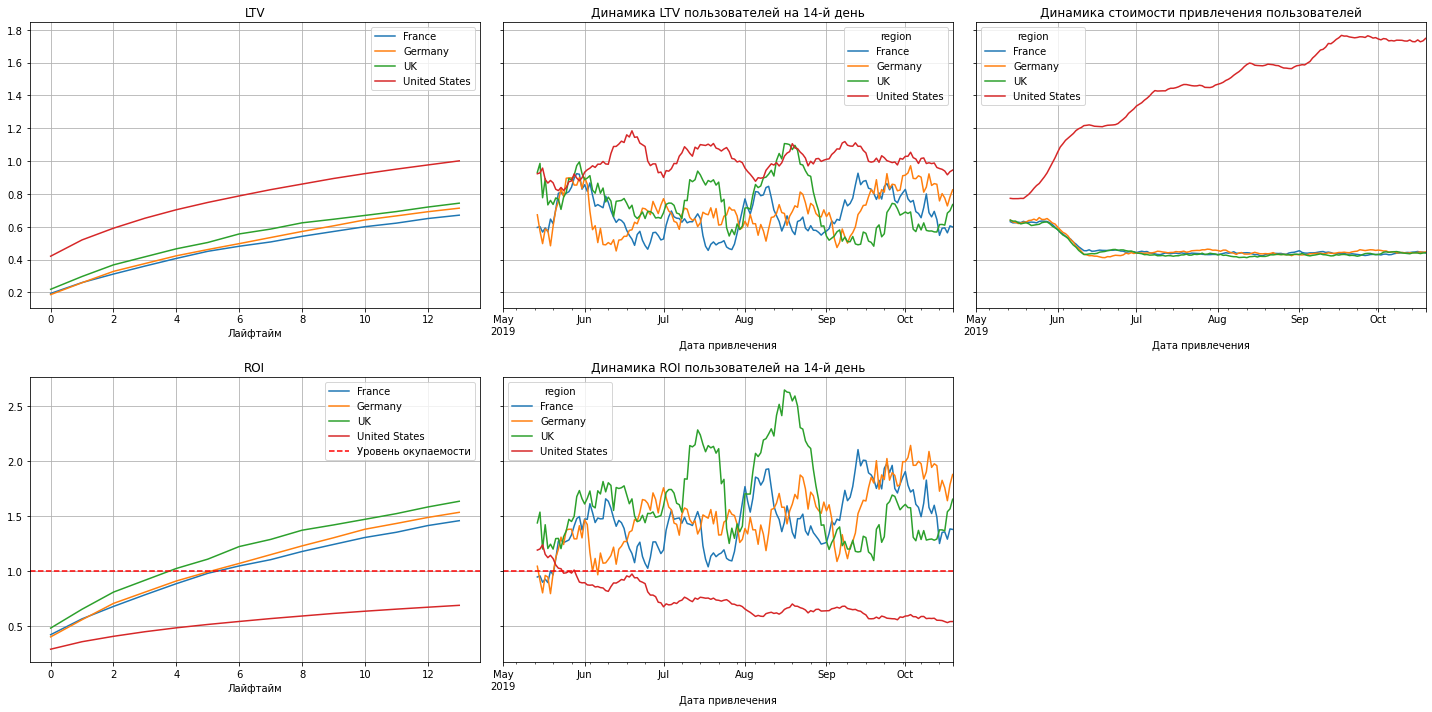

In [44]:
# смотрим окупаемость с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы**
График ROI c разбивкой по странам показывает, что:
* пользователи из Великобритании окупают затраты на привлечение на 5 день, Германии и Франции - на 6-й;
* пользователи из США не окупаются в течение 14 дней после привлечения, несмотря на самый высокий график удержания на протяжении почти всего периода исследования.

Динамика стоимости привлечения пользователя:
* в США растёт от месяца к месяцу, за исключением последнего;
* по остальным странам после первого месяца идёт спад и далее показатель устанавливается на более низком уровне.

Пропорционально CAC по США падает и ROI.

#### Анализ США

*Далее рассмотрим разбивки по остальным признакам только для проблемного региона - США.*

In [45]:
#срез платных пользователей для США
paid_profiles_us = paid_profiles.query('region == "United States"')

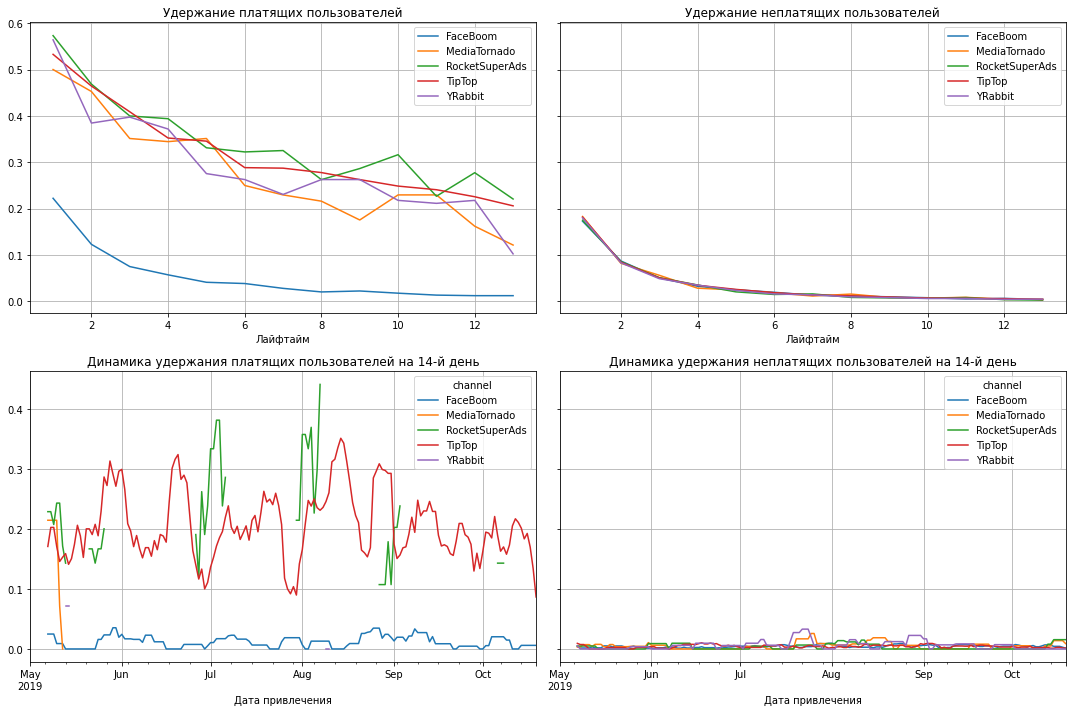

In [46]:
#удержание для каналов США
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles_us, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод**

На графиках удержания видно:
* в США используется 5 каналов привлечения: FaceBoom, MediaTornado, RocketSuperAds, TipTop, YRabbit;
* удержание FaceBoom заметно ниже остальных каналов, образующих группу кривых ~ на 3 ед. выше;
* кривые TipTop и FaceBoom наименее разбросаны - это может быть обусловлено большим количеством привлекаемых пользователей.

В динамике удержания:
* LTV FaceBoom практически не колеблется;
* разброс удержания RocketSuperAds и TipTop похожи, однако, канал RocketSuperAds заметен в менее чем половине временных когорт;
* MediaTornado и YRabbit заметны только в майских когортах.


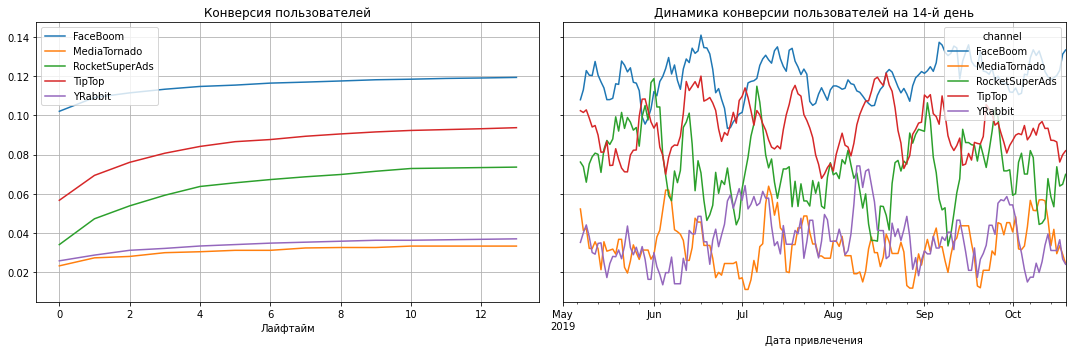

In [47]:
#таблицы конверсии для США по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles_us, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод**

На графиках конверсии в США по каналам видно:
* конверсия FaceBoom - максимальная, минимальные: MediaTornado и YRabbit. Кривые TipTop и RocketSuperAds распределились между ними на примерно равном расстоянии;
* изменения по лайфтайму у TipTop и RocketSuperAds больше, чем у остальных;
* в динамике конверсии: по всем каналам виден широкий разброс. Наибольший - у RocketSuperAds.     

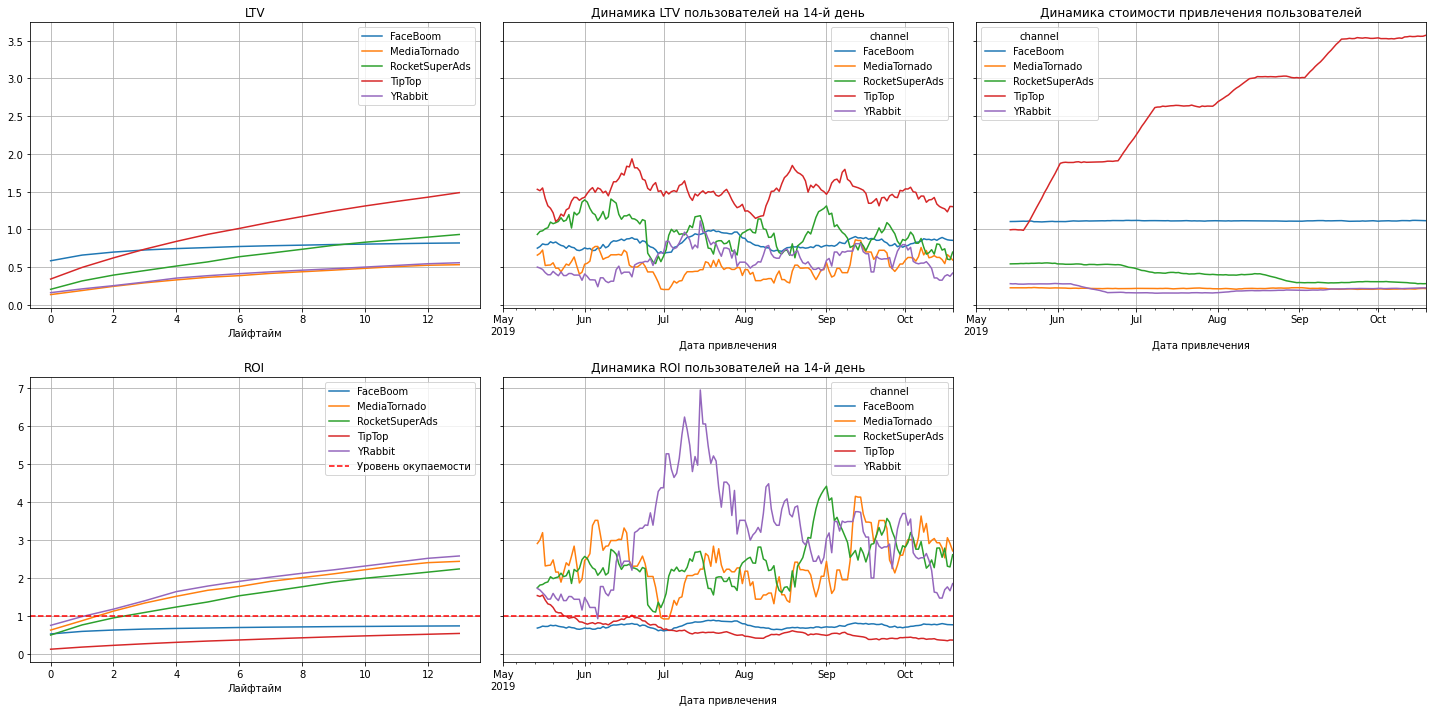

In [48]:
# смотрим окупаемость с разбивкой по источникам привлечения для США
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles_us, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод**

* Не окупаются 2 канала: TipTop и FaceBoom;
* Стоимость привлечения для TipTop растёт с каждым месяцем, FaceBoom - стабильная;
* По остальным каналам показатели показывают динамику улучшения.

Стабильность `LTV` и рост `CAC` для TipTop может говорить о росте конкуренции или увеличении бюджета по каналу - зависит от модели рекламной кампании.

*Далее рассмотрим проблемные каналы: TipTop и FaceBoom.*

In [49]:
#страны, в который используются данные каналы
paid_profiles.query('channel == "TipTop" or channel == "FaceBoom"')['region'].value_counts()

United States    48328
Name: region, dtype: int64

*TipTop и FaceBoom используются только в США.*

#### Анализ TipTop

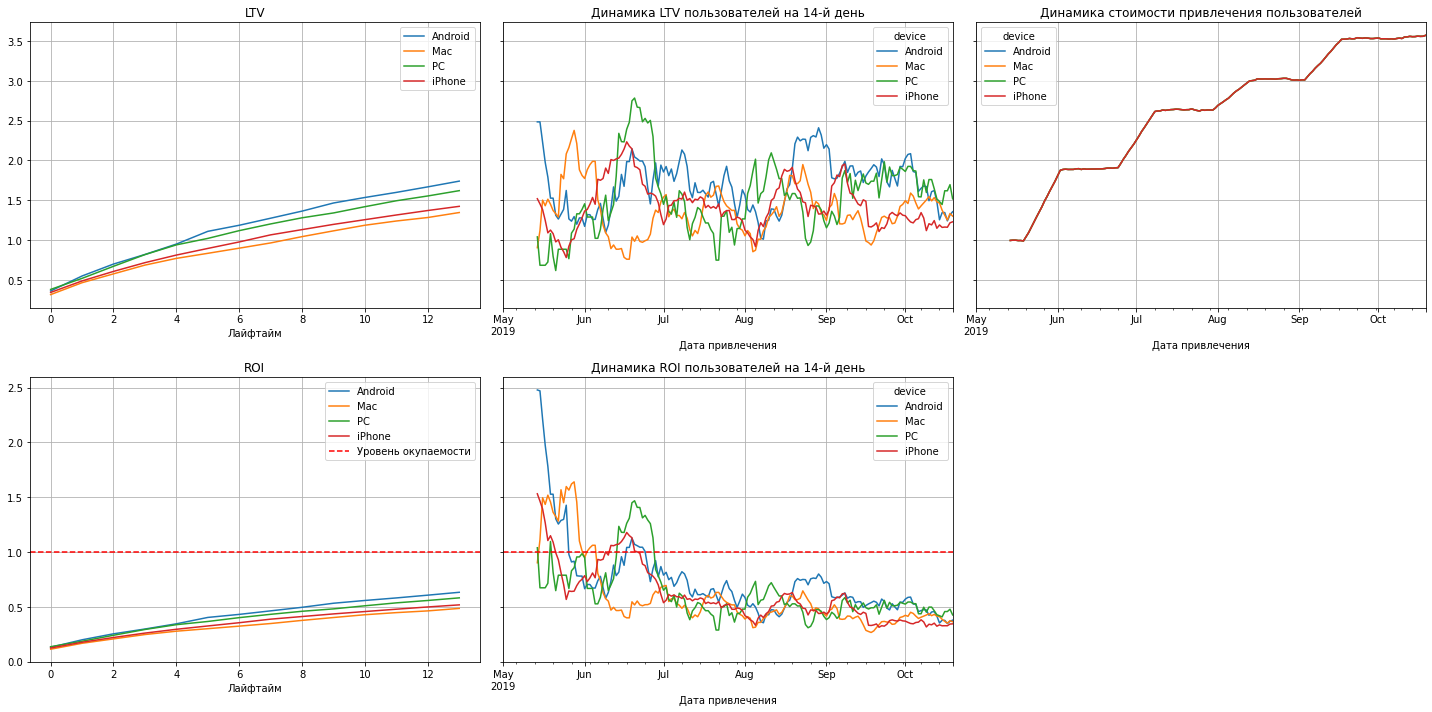

In [50]:
#срез платных пользователей для США, канал TipTop
paid_profiles_us_tt = paid_profiles_us.query('channel == "TipTop"')

# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles_us_tt, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод**

Окупаемость TipTop за весь период не зависит от устройств - не окупаются все.

В динамике ROI видно, что привлеченные в первой половине мая пользователи Mac, Android и iPhone в зоне окупаемости - это период минимальной стоимости привлечения. Часть июньских когорт с PC, iPhone и Android окупаются. Далее графики динамики ROI по устройствам сближаются и падают ниже уровная окупаемости с очередным ростом стоимости CAC.

Канал не окупается по причине резко растущей стоимости привлечения.

#### Анализ FaceBoom

In [51]:
#срез платных пользователей для США, канал FaceBoom
paid_profiles_us_fb = paid_profiles_us.query('channel == "FaceBoom"')

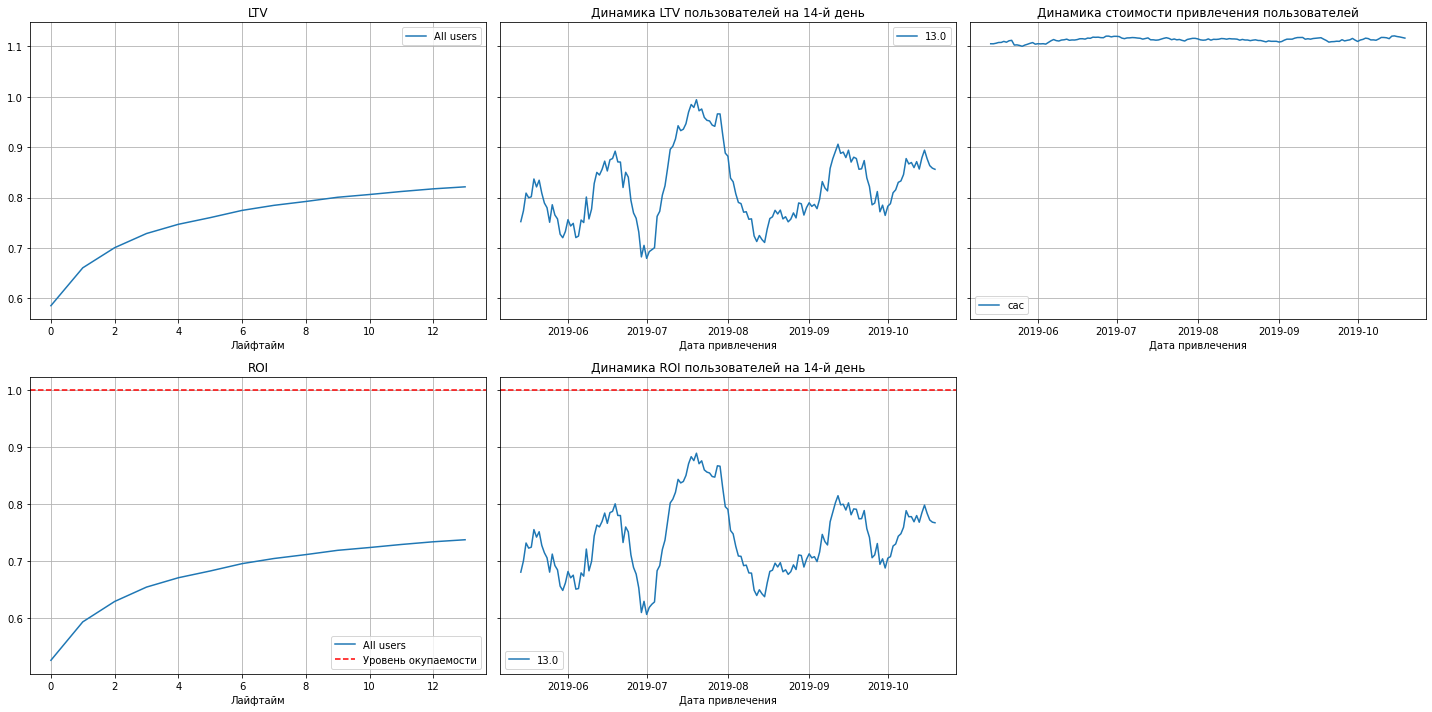

In [52]:
#окупаемость по FaceBoom для США (совпадает с общей, т.к. канал используется только в этой стране.)
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles_us_fb, orders, observation_date, horizon_days
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод**

На графиках бизнес-показателей видно:
* LTV и ROI имеют парвильные кривые и динамику, но ниже отметки окупаемости;
* CAC стабильна, но очевидно выше, чем нужно.

Канал не окупается из-за высоких затрат на одного пользователя.

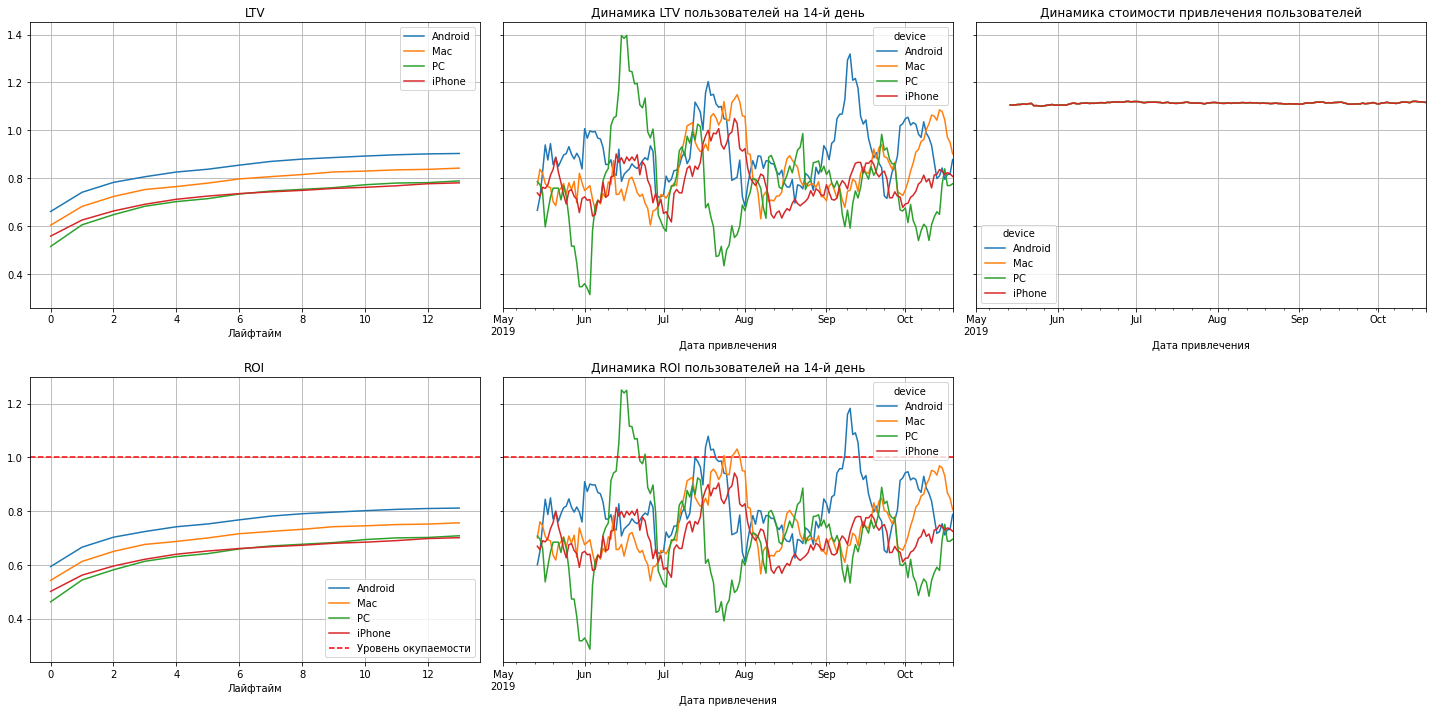

In [53]:
#смотрим окупаемость FaceBoom с разбивкой по устройствам
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles_us_fb, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод**
Android и Mac ближе к окупаемости в FaceBoom, однако, за отчетный период не окупаются пользователи по всем устройствам.

Динамика ROI сильно разбросана по устройствам. Кривые нескольких временных когорт выше окупаемости: часть июньских PC, часть июльских и сентябрьских с Android и совсем маленькая часть июльских когорт с Mac.

Основной причиной неокупаемости Faceboom является низкий коэффициент удержания, при хорошей конверсии. Однако есть отдельные окупившиеся сегменты, долю которых можно увеличить.

### Oкупаемость с разбивкой по каналам

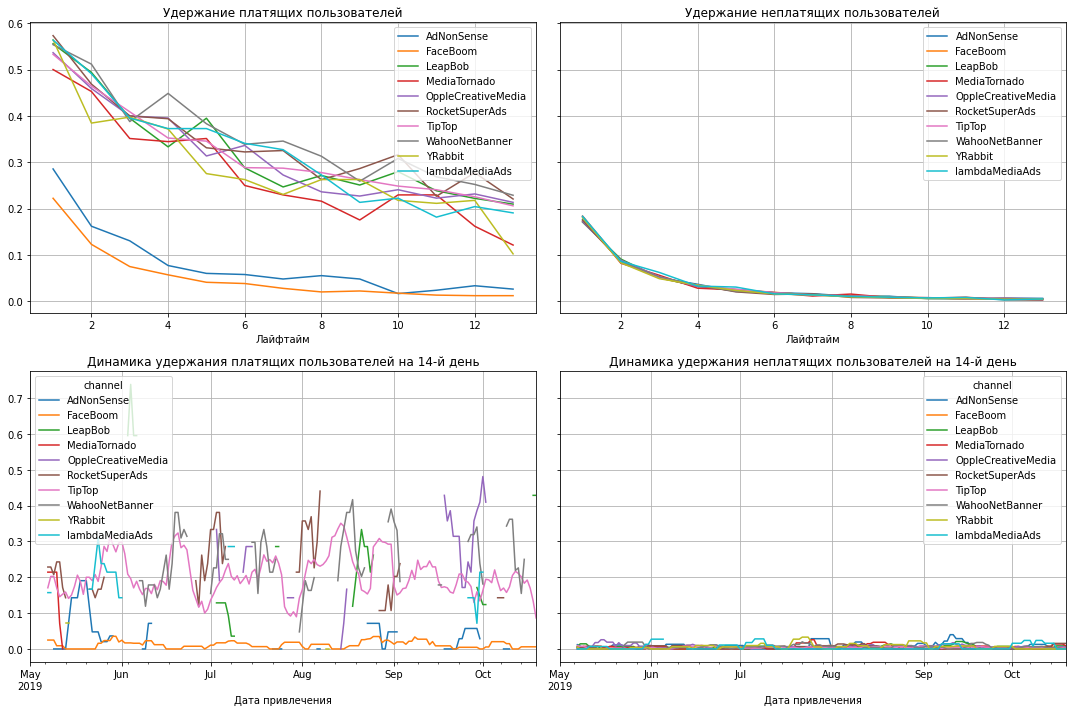

In [54]:
#таблицы удержания с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод**

На графиках удержания видно:
* каналы AdNonSense и Faceboom имеют минимальный коэффициент удержания. Удержание платящих и неплатящих для них практически равны;
* кривые удержания платящих по остальным каналам образуют группу на ~2,5 ед. выше;
* удержание неплатящих пользователей по всем каналам одинаковое.

В динамике удержания:
* неприрывные линии только у Faceboom и TipTop;
* динамика конверсии всех каналов, кроме Faceboom имеет широкий разброс, у TipTop - общий вектор на одном уровне, у остальных каналов не оценить из-за больших разрывов;
* Удержание неплатящих пользователей в динамике по всем каналам также практически одинаковое, с небольшими всплесками все кривые в районе 0.  

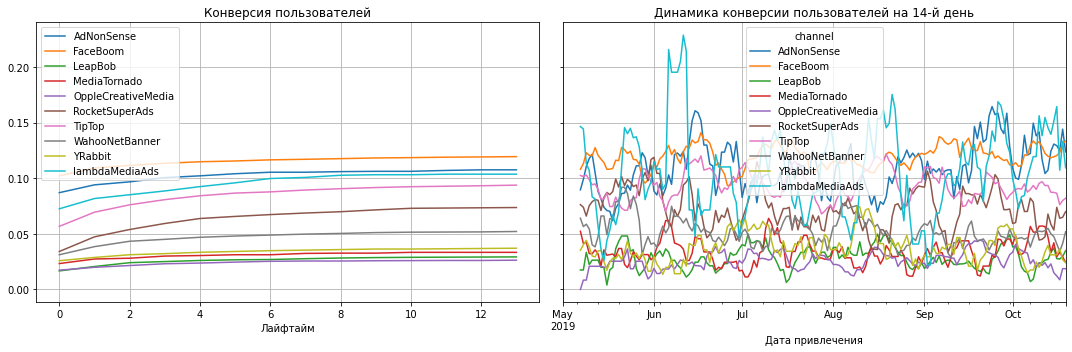

In [55]:
#таблицы конверсии с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод**

На графиках конверсии видно:
* конверсия FaceBoom - максимальная(0,10-0,13) , OppleCreativeMedia(0,02-0,03) - минимальный;
* конверсия во Франции, Германии и Великобритании ~0,35 на 1 день удержания и ~0,5 на 14 день.

В динамике конверсии:
* Конверсия каналов изменяется не синхронно;
* Ни один график на протяжении исследуемого периода не демонстрирует стабольного роста или падения.</li>  


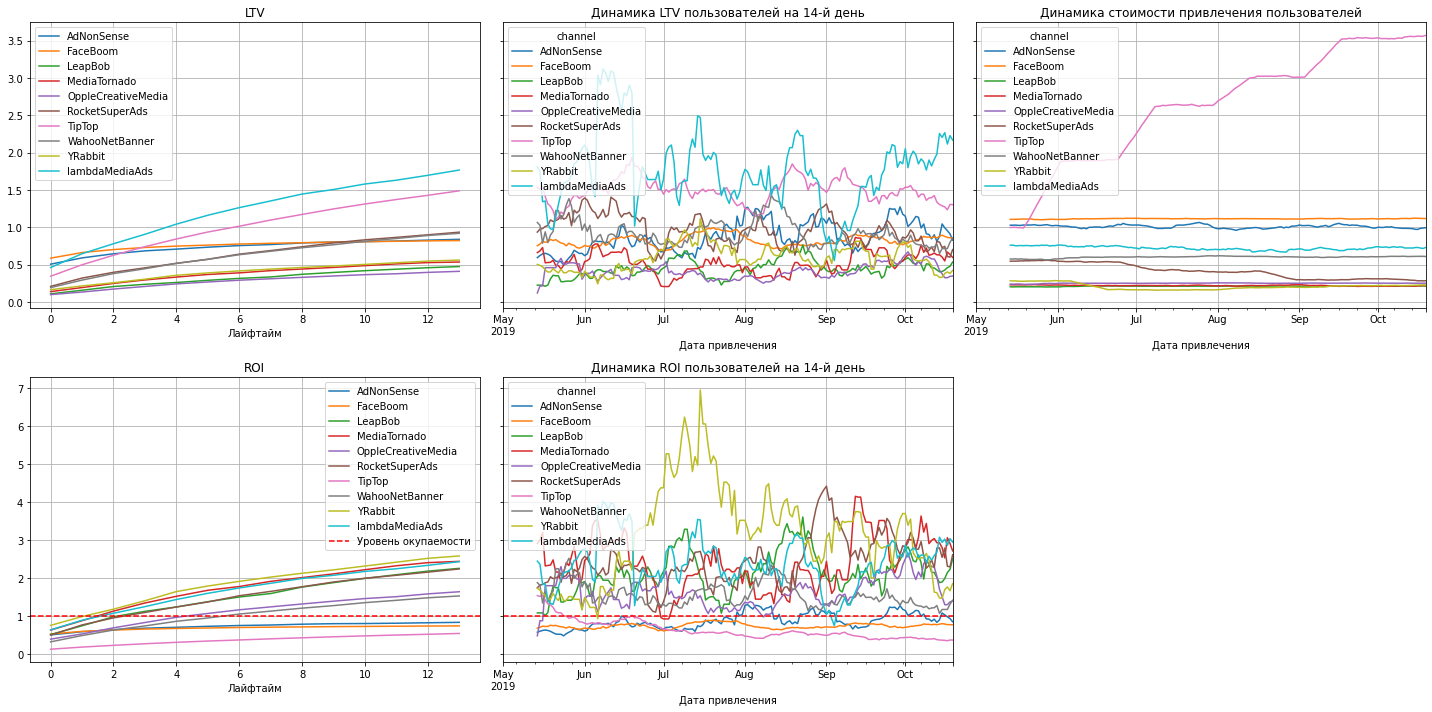

In [56]:
# окупаемость с разбивкой по каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы**

График бизнес-показателей по каналам показал, что 6 рекламных каналов окупаются на 1-6 день после привлечения пользователя. Не окупаются 3 канала:
* TipTop, 
* FaceBoom,
* AdNonSense.

По окупаемым каналам отметим, что динамика LTV относительно стабильна: колебания в пределах 1,5-2х единиц.

Исключение - lambdaMediaAds. Суммарно, у этого канала самый высокий коэффициент удержания, однако в динамике LTV не стабилен: скачки от 3,2 до 0,5. В динамике окупаемости так же видны большие перепады вплодь до кратковременного выпада ниже окупаемости.

Динамика окупаемости для остальных окупающихся каналов:
* MediaTornado, LeapBob, OppleCreativeMedia - положительная;
* WahooNetBanner - стабильная;
* YRabbit в части июльских когорт и RocketSuperAds в когортах конца августа - имеют пики, затем снижается. CAC по этим каналам также снижается.

Рекомендовано обратить внимание на успешные периоды для каналов YRabbit и RocketSuperAds для максимизации ROI.

*Не окупаются 3 канала: TipTop, Faceboom и AdNoncence. Первые 2 рассмотрены выше. Далее рассмотрим только AdNonSense.*

#### Анализ AdNonSense

In [57]:
#срез по AdNonSense
paid_profiles_channel_ans = paid_profiles.query('channel == "AdNonSense"')

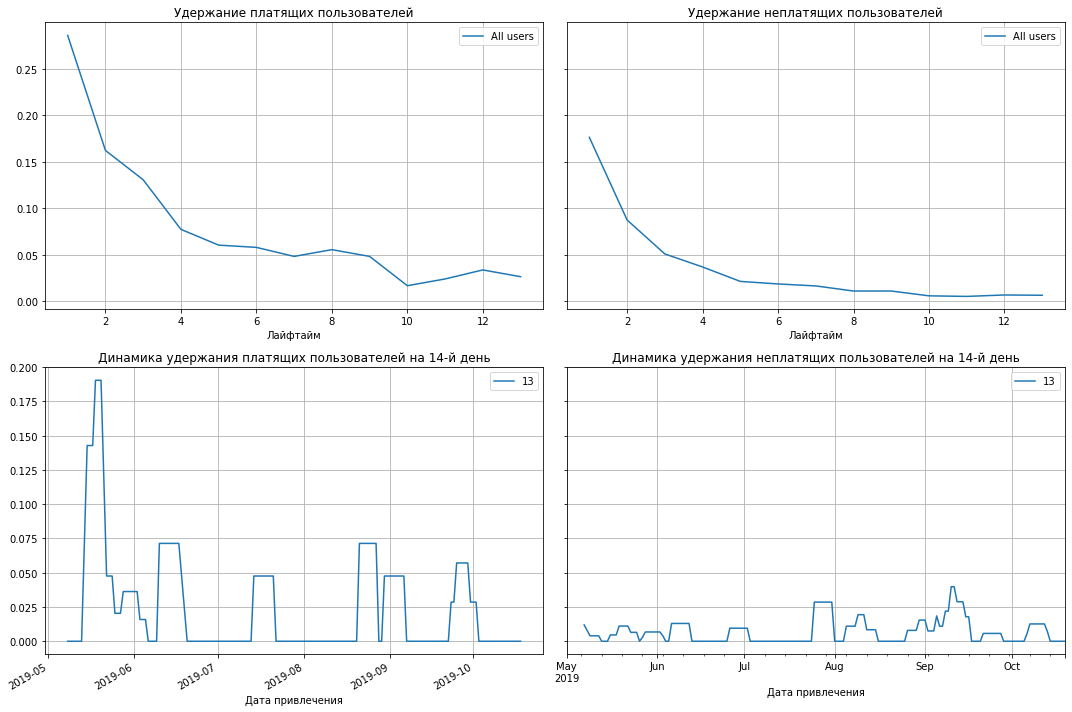

In [58]:
#таблицы удержания по AdNonSense
retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles_channel_ans, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод**

Удержание платящих и неплатящих пользователей практически на одном уровне, что нетипично. В сравнении с другими каналами видно, что это очень низкий показатель.

Динамика удержания пользователей нестабильна. В ряде когорт она равна 0, т.е. в ряде когорт нет пользователей проживших все 14 дней, либо кампания останавливалась.

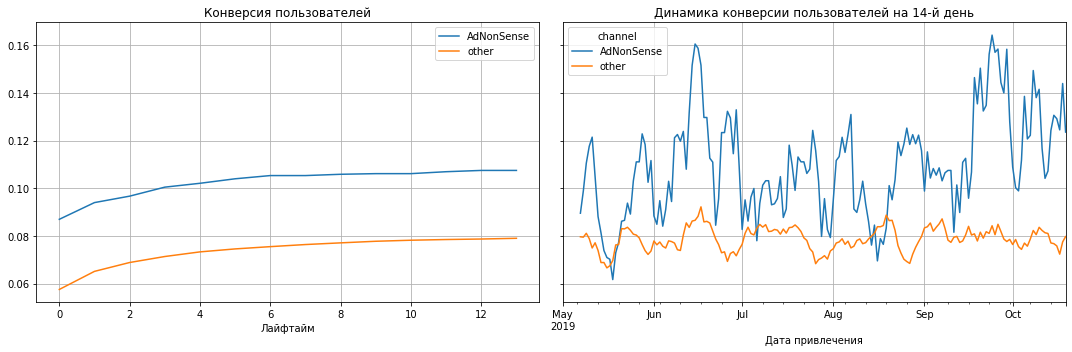

In [60]:
#таблицы конверсии по AdNonSense в сравнении с остальными окупаемыми каналами
paid_profiles_channel_ans1 = paid_profiles.query('channel != "FaceBoom" | channel != "TipTop"')
paid_profiles_channel_ans1.loc[paid_profiles_channel_ans1['channel'] != "AdNonSense", ['channel']] = 'other' #объединение остальных окупаемых каналов

dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles_channel_ans1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 



**Вывод**

Конверсия покупателей AdNonSense находится на высоком уровне.

Динамика конверсии AdNonSense имеет положительный вектор, но высокий разброс.

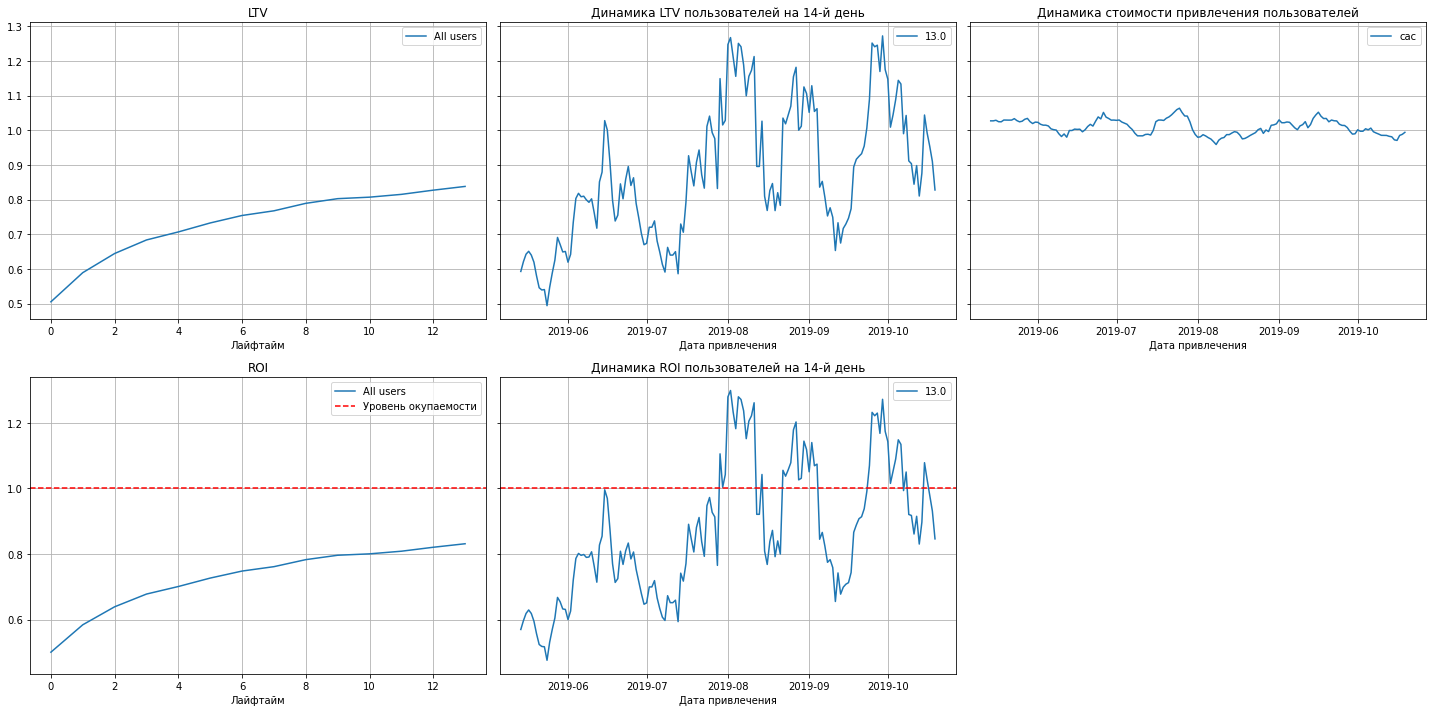

In [61]:
#общая окупаемость AdNoncence
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles_channel_ans, orders, observation_date, horizon_days
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**

На графиках бизнес-показателей видно:
* LTV и ROI имеют парвильные кривые но ниже линии окупаемости;
* динамика LTV и ROI в целом положительна - отедельный когорты, привлеченные с конца июня демонстрируют окупаемость;
* CAC имеет небольшие колебания, однако небольшие пики совпадают с крупными провалами в LTV и ROI.

Вероятная причина неокупаемости канала - нестабильная конверсия. Это подтверждают высокие колебания удержания и ROI на фоне не сильно выраженных колебаний CAC.

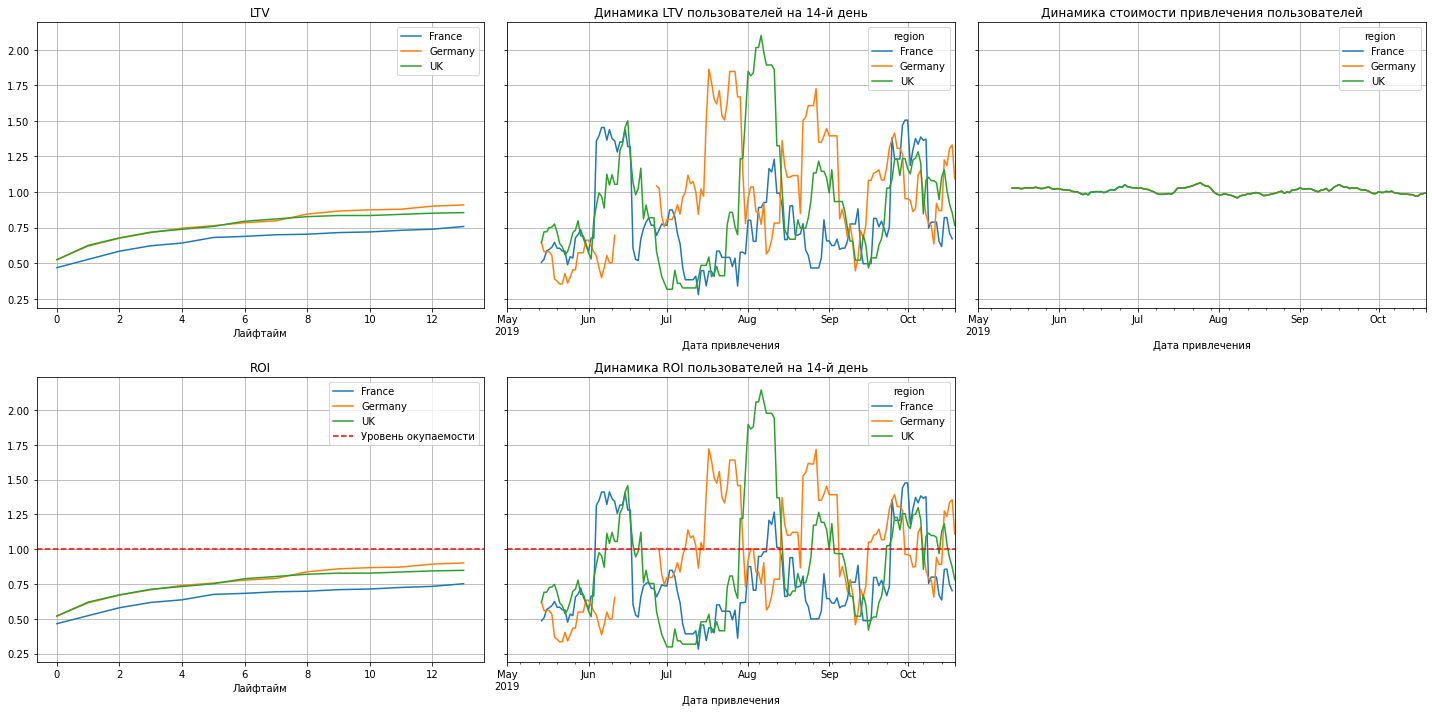

In [62]:
#окупаемость с разбивкой AdNoncence странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles_channel_ans, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)


**Вывод**

Анализ AdNonSense c разбивкой по странам показал:
* канал используется в Германии, Франции и Великобритании;
* AdNonSense в целом не окупается ни по одной стране;
* динамика показывает успешные периоды в каждой из стран;
* всплески и падения LTV и ROI приемущественно в одних временных когортах, за исключением привлеченных в конце июля-начала августа по Германии;
* в Германии наблюдается разрыв в июньских когортах в динамике LTV и ROI. (Прекращались показы?);
* кривая CAC по странам совпадает.

Разрывы возможны из-за низких бюджетов - малый бюджет приводит и к тому, что может не быть платящего в какой-то промежуток времени и тогда LTV не сущесвует.

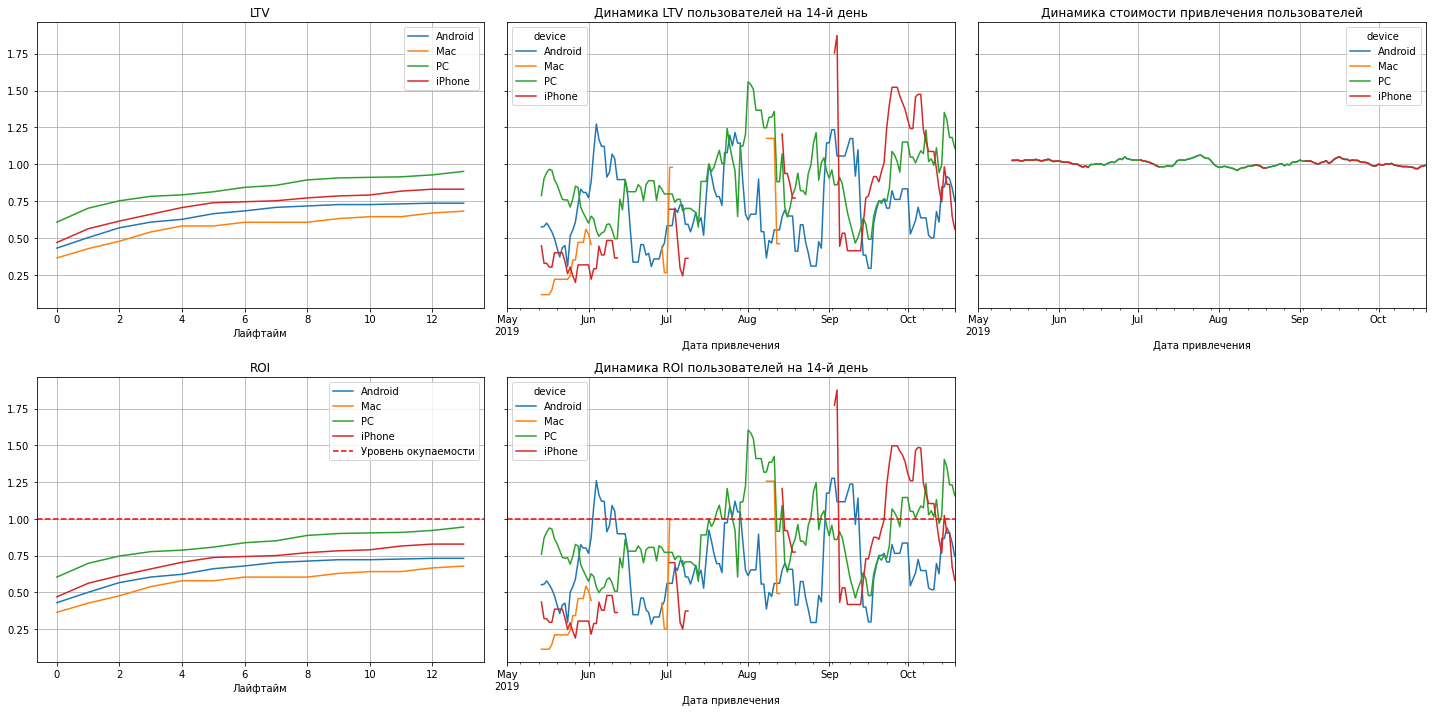

In [63]:
#окупаемость с разбивкой AdNonSense устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles_channel_ans, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**

Анализ AdNonSense c разбивкой по устройствам показал:
* канал привлекает пользователей со всех устройств анализа;
* AdNonSense в целом не окупается ни с одного устройства. ROI для PC максимальный, Mac - минимальный;
* динамика ROI и LTV скачкообразная, основной вектор положительный. Наблюдаются разрывы;
* кривая CAC по устройствам совпадает, за исключением разрывов.

Прослеживается влияние устройств на эффективность рекламы. Наиболее близки к окупаемости пользователи PC.

### Окупаемость с разбивкой по устройствам

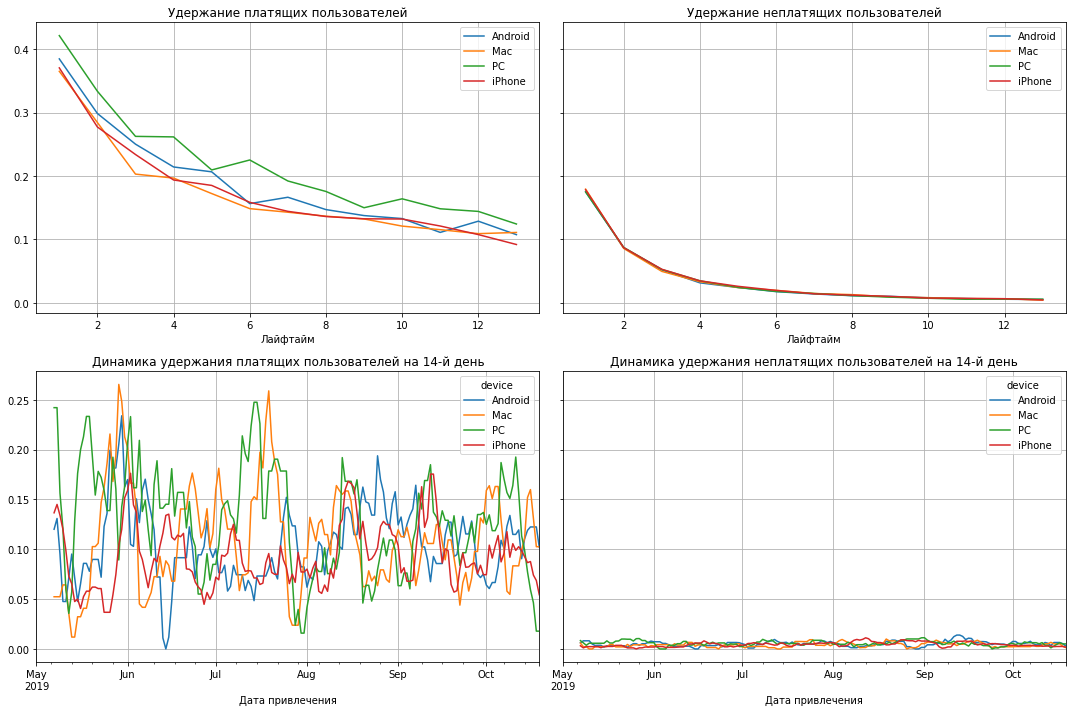

In [64]:
#таблицы удержания с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<b>Вывод</b>
<p>На графиках удержания видно:
<ul>
    <li>Графики удержания по всем устройствам находятся близко друг к другу. Чуть выше PC.</li>
    <li>Удержание неплатящих пользователей во всех странах одинаковое, ниже кривых удержания платящих.</li>
    </ul></p>
<p>В динамике удержания:
<ul>
    <li>Все графики динамики имеют широкий разброс до сентябрьских когорт. После разброс сужается.</li>
    <li>Спады и взлёты асинхронны.</li>
    <li>Удержание неплатящих пользователей в динамике по всем устройствам практически одинаковое, все кривые в районе 0.</li>
    </ul></p>    
  

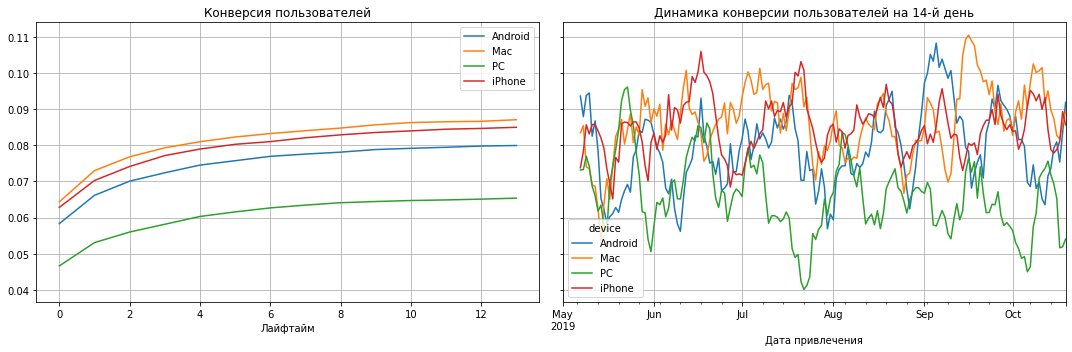

In [65]:
#таблицы конверсии с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод**

На графиках конверсии видно:
* Конверсия PC существенно ниже, чем по остальным устройствам: ~0,3 на 1 день удержания и ~0,65 на 14 день;
* Максимальная конверсия у Mac и iPhone ~0,5 на 1 день удержания и ~0,85 на 14 день.

В динамике конверсии:
* динамика конверсии всех устройств имеет большой разброс;
* кривые Android, Mac и iPhone демонстрируют небольшой рост, PC - спад;
* динамика кривых не синхронна.

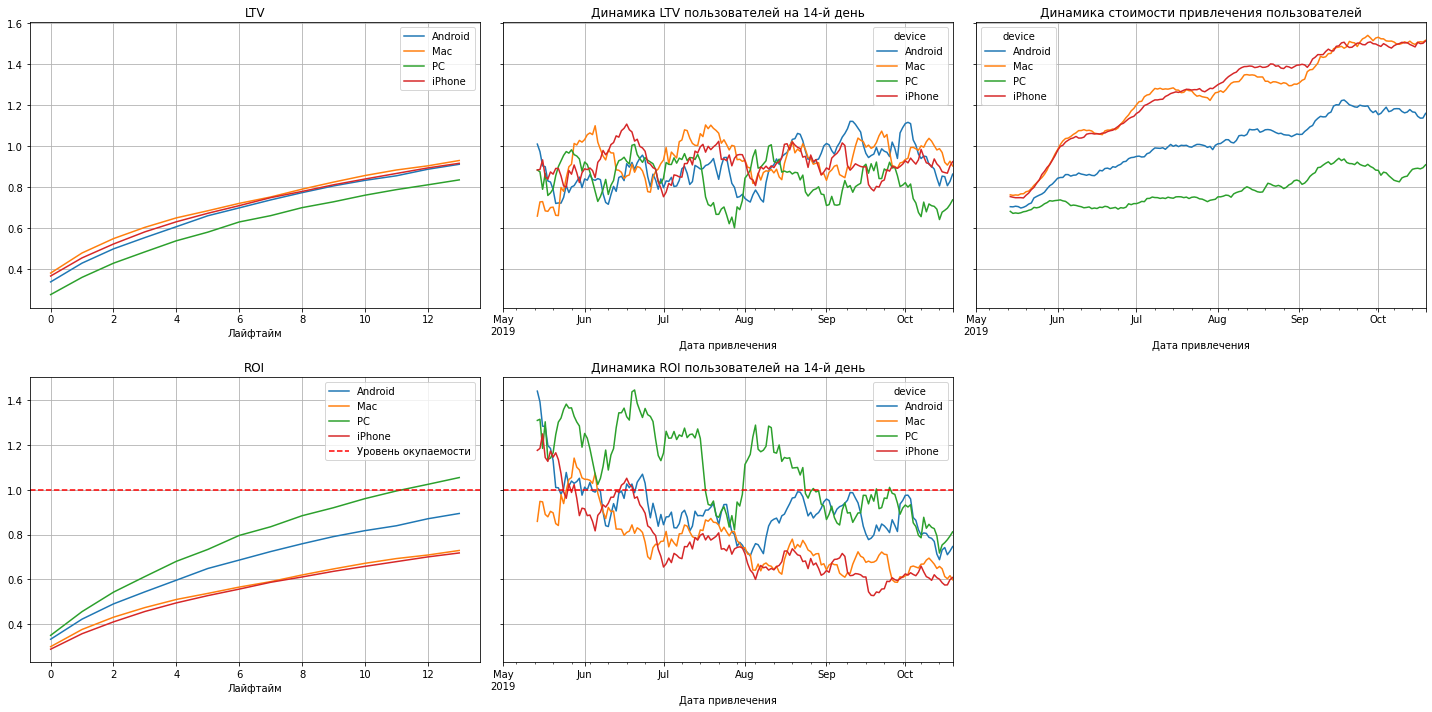

In [66]:
# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Окупаемость для Android странам


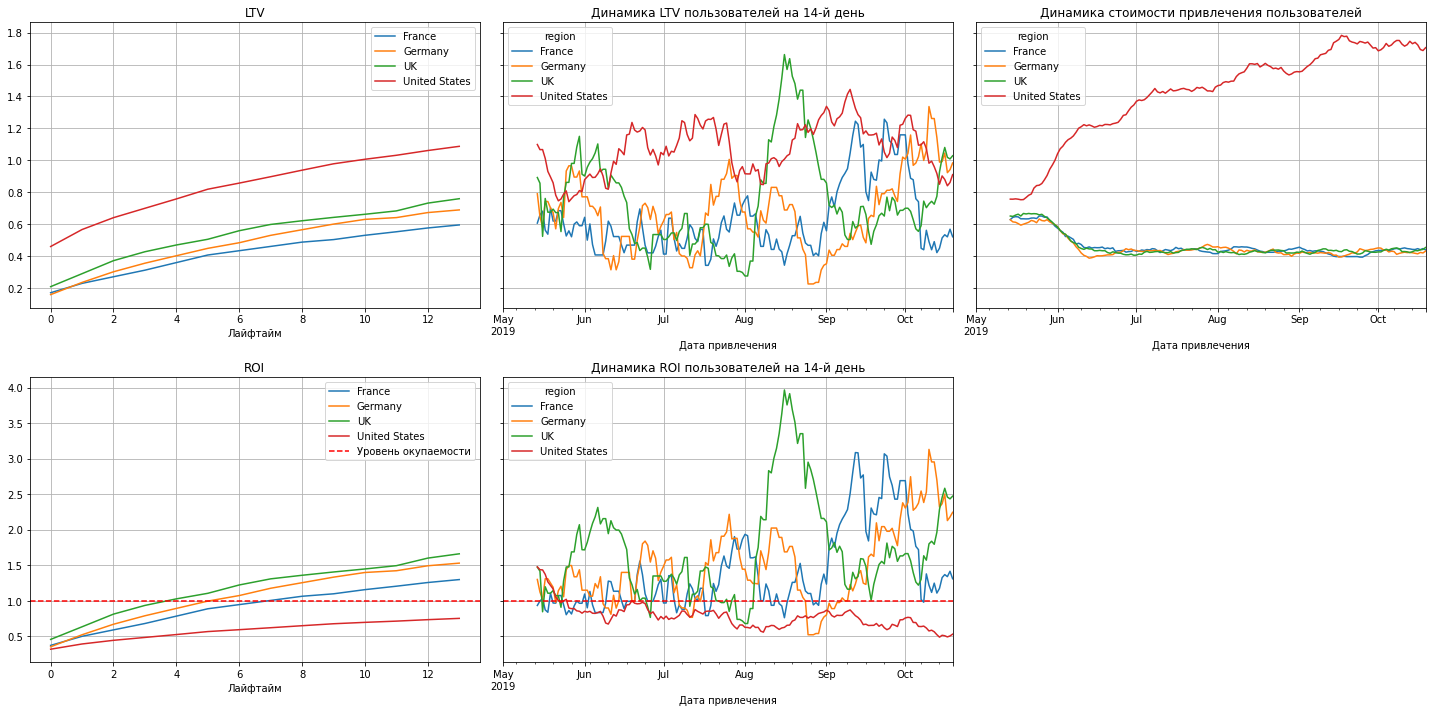



Окупаемость для Mac странам


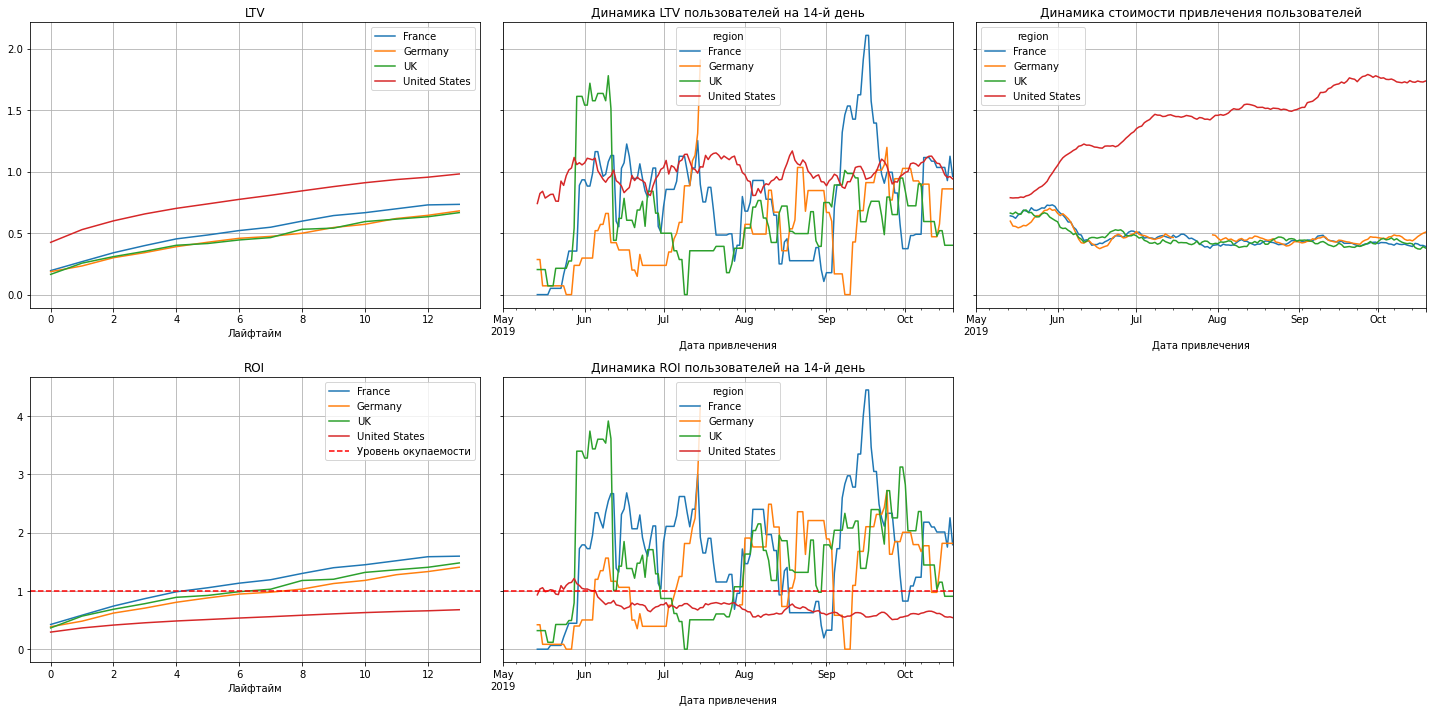



Окупаемость для PC странам


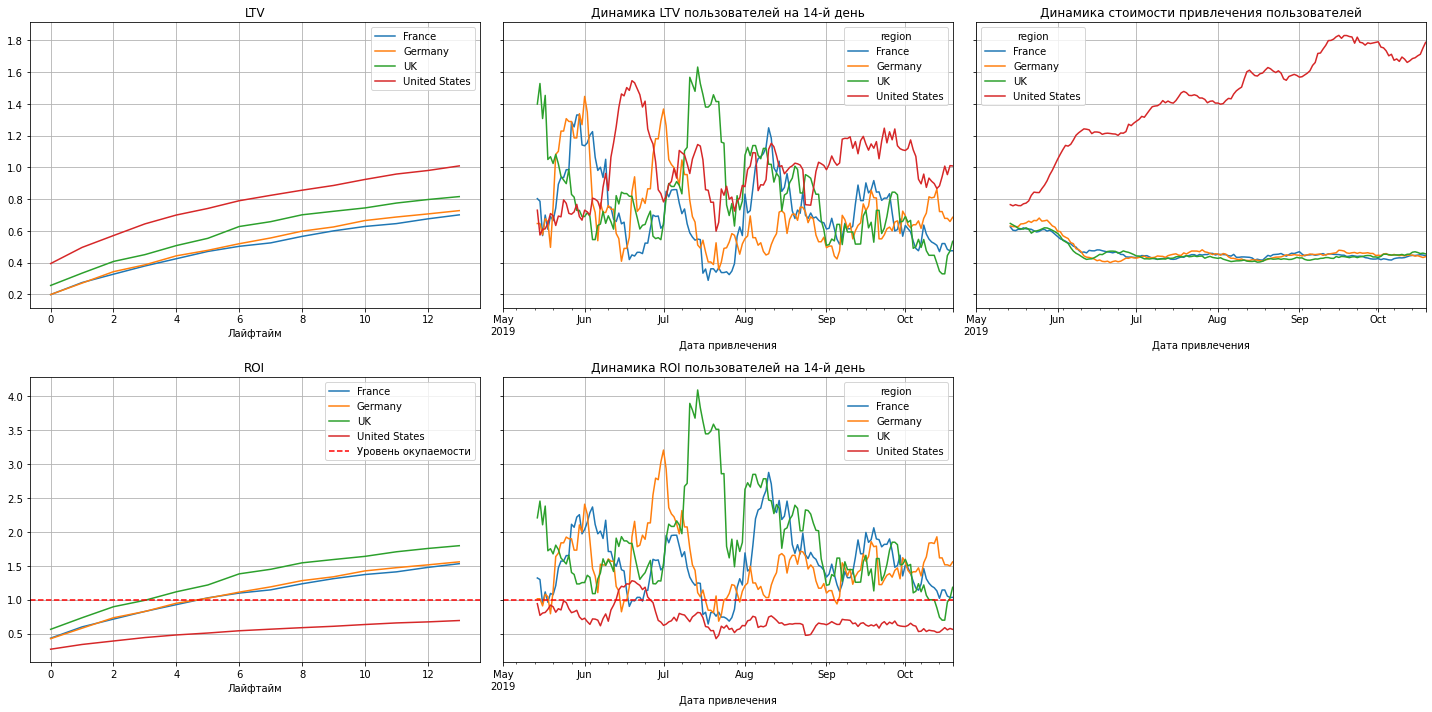



Окупаемость для iPhone странам


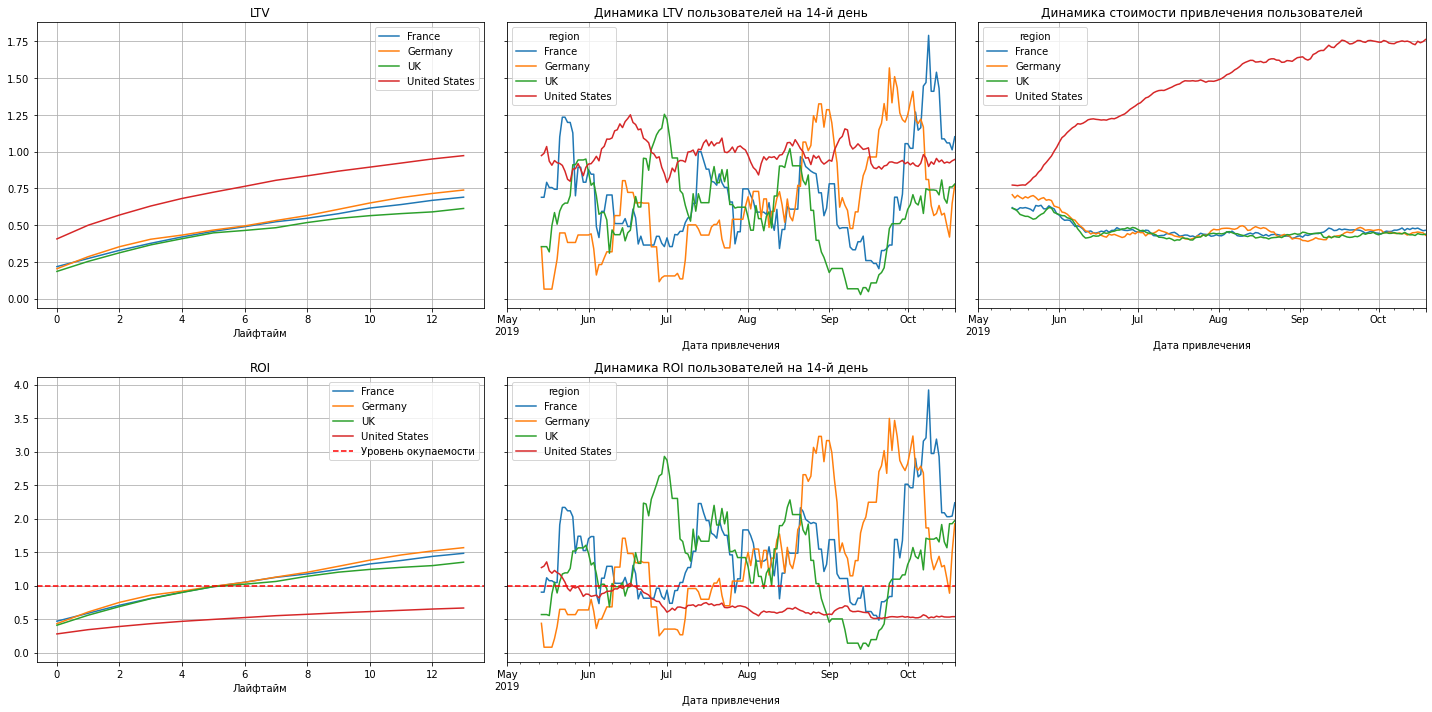

In [67]:
# смотрим окупаемость с разбивкой по странам для каждого устройства
for i in ['Android', 'Mac', 'PC', 'iPhone']:
    paid_profiles_dev_reg = paid_profiles.query('device == @i')
    dimensions = ['region']
    print('Окупаемость для', i, 'странам')
    ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
        paid_profiles_dev_reg, orders, observation_date, horizon_days, dimensions=dimensions
    )
    plot_ltv_roi(
        ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 
    print()
    print()

**Выводы**

График бизнес-показателей c разбивкой по устройствам показал, что:
* в целом только окупаются только пользователи с PC - на 12 день после привлечения. Однако, общие показатели портит большая доля США с плохой статистикой;
* в странах Европы пользователи со всех устройств окупаются в промежутке 3-9й день после привлечения;
* графики динамики LTV и ROI по странам Европы демонстрируют большой разброс. Вектор положительный для всех устройств кроме PC; 
* CAC по странам Европы для всех устройств снижается для июньских когорт и дальше стабилен.


## Выводы и рекомендации
 
### Предобработка данных

**visits_info_short.csv**

Таблица содержит данные о 309901 сессии с 1 мая по 31 октября 2019г пользователей из США, Великобритании, Франции и Германии.
Устройства пользователей: iPhone, Android, Mac, PC.

Каналы привлечения: поисковый трафик и 9 рекламных систем(TipTop, FaceBoom, WahooNetBanner, LeapBob, OppleCreativeMedia, RocketSuperAds, MediaTornado, YRabbit, AdNonSense, lambdaMediaAds).

**orders_info_short.csv**

Таблица содержит данные о 40212 заказах за период, аналогичный предыдущей таблицы. Сумма выручки с одного заказа составляет от 4.99 USD до 49.99 USD. 

**costs_info_short.csv**

В таблице приеведены данные о 1800 временных отрезках с 1 мая по 27 октября. Это отличается от предыдущих отчетов: последние данные начало 27-ого октября, а не 31. Отсутствует информация за последние 5 дней относительно предыдущих таблиц. В дальнейшем необходимо исключить из исследования пользователей, привлеченных после этой даты.

Во всех таблицах полных дубликатов, пропусков и аномалий нет. Скорректированы названия столбцов и форматы id и дат.

### Исследовательский анализ данных

Для исследования используются данные о пользователях, привлеченных с 1 мая по 26 октября 2019г включительно.
Рассчет общей конверсии в покупку показал следующие результаты:
1. Наибольшая конверсия в США - 6,9%; наименьшая во Франции - 3,7%. Отметим, что пользователей из США практически в 5 раз больше, чем в любой другой стране.
2. Наибольшая конверсия с утройств Mac и iPhone - 6,2% и 6,3%; наименьшая у PC и Android - 5% и 5,8%. Количество пользователей распределено равномернее: по 30-35 тыс. PC, Android и Mac, с отрывом iPhone c 54 тыс. пользователей.
3. Наибольшая конверсия у палатного канала FaceBoom - 12%, наименьшая у органического поиска - 2%. Лидерами по привелечению пользователей являются органический поиск(56 тыс.) и 2 платных канала: FaceBoom (29 тыс.) и TipTop(19 тыс.), остальные рекламные каналы привлекли не более 9 тыс. каждый. Низкая конверсия органики обусловлена отсутствием какой либо оптимизации на привлечение платящих пользователей.
	
### Маркетинг

Общая сумма расходов на маркетинг составила 105497.3 USD

Больше всего было потрачено на TipTop и FaceBoom: 55 тыс. USD и 32 тыс. USD. Траты на остальные каналы составили от 0.9 до 5 тыс. USD.

Помесячная динамика демонстрирует, что затраты наиболее дорогого канала TipTop росли на протяжении практически всего исследовательского периода, снижение видно только на последнем месяце. Уровень максимально месячного расхода FaceBoom практически достигает за первый месяц, далее виден небольшой рост в середине периода, в целом динамика пологая. Изменение трат на остальные каналы в абсолютных суммах не так существенны, динамика в целом также пологая. Отметим: очевидно за первый месяц был снижен бюджет на AdNonSense и увеличен на RocketSuperAds.

На понедельной разбивке видны 2 пика по каналам TipTop и FaceBoom в конце июня и конце сентября. Данные пики также заметны на остальных каналах, однако их абсолютное выражение значительно меньше.

Самая высокая стоимость привелечения у канала TipTop: 2,79 USD, что в 2,5 раза превышает стоимость привлечения по второму по дороговизне каналу FaceBoom: 1,11 USD. Третий по стоимости привлечения канал - AdNonSense: 1,01 USD. Стоимость привлечения одного пользователя составляет от 0,72 до 0,21 USD.	

### Окупаемость рекламы

Установлены входные данные для расчета бизнес-показателей: 
* 1 ноября 2019г - момент анализа,
* за горизонт анализа принят максимальный предполагаемый срок окупаемости рекламы - 14 дней.

Из анализируемых данных исключены пользователи, пришедщие из органического поиска.

Из графика ROI видно, что реклама за весь исследуемый промежуток времени не окупается за планируемый горизонт. Максимальный показатель ROI 0,8 к концу 2-х недельного периода.

В разбивке ROI на когорты по дате привления, окупились когорты мая и частично июня. ROI падает пропорционально росту CAC.
Показатель динамики удержания пользователей колеблется в пределах когорт одного месяца, но в целом стабильна в диапазоне от 0,8 до 1,1. В когортах за последние 2 меясца разброс этого показателя уменьшается. Сезонность или другие факторы, влияюшие на привлечение пользователей в конкретный период времени,  судя по графику, отсутствует.

Динамика стоимости привлечения 1 пользователя (CAC) растёт для пользователей, привлеченных в период с середины мая по первую неделю сентября. Небольшой спад заметен для привлеченных в первые 2 недели мая. Для когорт привлечения со второй недели сентября по конец октября стабилен на высоком уровне.

Плятящие пользователи удерживаются лучше неплатящих.

Конверсия пользователей на протяжении лайфтайма растёт от 0,5% в первый день до 0,8% на 14 день. Конверсия по временным когортам показывает колебания в пределах одного месяца, но в целом на протяжении всего периода в среднем составляет 0,8% на 14 день, что соответствует общему ROI. 

#### Проблемные  страны

Удержание по странам:
* платящие пользователи США удерживаются хуже;
* LTV во Франции, Германии и Великобритании не так равномерно, как в США;
* удержание неплатящих пользователей одинаковое.
    
В динамике удержания:
* разброс LTV по временным когортам в США более равномерный, порядка 0,1;
* во Франции, Германии и Великобритании средний уровень выше, однако присутствуют большие колебания и разрывы по каждой из стран;
* удержание неплатящих пользователей в динамике во всех странах также практически одинаковое, с небольшими всплесками все кривые в районе 0.
        
Разрывы в динамике удержания вероятно связаны с приостановкой рекламы.

Конверсия по странам:
* в США существенно выше: ~0,7 на 1 день удержания и ~0,95 на 14 день.
* во Франции, Германии и Великобритании ~0,35 на 1 день удержания и ~0,5 на 14 день.
    
В динамике конверсии:
* пользователи из США не окупаются в течение 14 дней после привлечения;
* кривые по Франции, Германии и Великобритании, однако относительно США составляют общую группу;
* во Франции, Германии и Великобритании разброс значительно шире.    
    
График бизнес-показателей по странам показал, что пользователи из США не окупаются в течение 14 дней после привлечения, несмотря на самый высокий график удержания на протяжении почти всего периода исследования. Вероятная причина: проблемные каналы привлечения, использующиеся в США.

#### Проблемные каналы

Удержание по каналам:
* AdNonSense и Faceboom имеют минимальный коэффициент удержания. Удержание платящих и неплатящих для них практически равны; 
* кривые удержания платящих по остальным каналам образуют группу на ~2,5 ед. выше.
* удержание неплатящих пользователей по всем каналам одинаковое.
    
В динамике удержания:
* стабильно привлекали пользователей только Faceboom и TipTop.
* динамика конверсии всех каналов, кроме Faceboom имеет широкий разброс, у TipTop - общий вектор на одном уровне.
* удержание неплатящих пользователей в динамике по всем каналам также практически одинаковое.
     
На графиках конверсии видно:
* Конверсия FaceBoom - максимальная(0,10-0,13) , OppleCreativeMedia(0,02-0,03) - минимальный.
* Конверсия во Франции, Германии и Великобритании ~0,35 на 1 день удержания и ~0,5 на 14 день.
    
В динамике конверсии:
* конверсия каналов изменяется не синхронно;
* ни один график на протяжении исследуемого периода не стабилен.  
        
График бизнес-показателей по каналам показал, что 6 рекламных каналов окупаются на 1-6 день после привлечения пользователя. Не окупаются 3 канала: TipTop, FaceBoom и AdNonSense.

**TipTop и FaceBoom(используются только в США):**
* стоимость привлечения для TipTop растёт с каждым месяцем, FaceBoom - стабильная;
* окупаемости нет за весь период по обоим каналам; 
* влияние устройства для привлеченных FaceBoom заметно больше (Android и Mac ближе к окупаемости), чем пришедших с TipTop.

Причина неокупаемости каналов:
* быстро растущая CAC для TipTop - вероятная причина: рост конкуренции;
* FaceBoom - низкий коэффициент удержания. Однако есть отдельные окупившиеся сегменты, долю которых можно увеличить.

На графиках бизнес-показателей видно:
* LTV и ROI имеют парвильные кривые но ниже линии окупаемости;
* Динамика LTV и ROI в целом положительна - отедельный когорты, привлеченные с конца июня демонстрируют окупаемость;
* CAC имеет небольшие колебания, однако небольшие пики совпадают с крупными провалами в LTV и ROI.
    
**Анализ AdNonSense по странам:**
* Канал используется в Германии, Франции и Великобритании. 
* AdNonSense в целом не окупается ни по одной стране.
* Динамика показывает успешные периоды в каждой из стран.
* Всплески и падения LTV и ROI приемущественно в одних временных когортах, за исключением привлеченных в конце июля-начала августа по Германии.
* В Германии наблюдается разрыв в июньских когортах в динамике LTV и ROI.
* Кривая CAC по странам совпадает.
    
**Анализ AdNonSense по устройствам:**
* канал привлекает пользователей со всех устройств анализа; 
* AdNonSense в целом не окупается ни с одного устройства. ROI для PC максимальный, Mac - минимальный;
* динамика ROI и LTV скачкообразная, основной вектор положительный. Наблюдаются разрывы;
* кривая CAC по устройствам совпадает.

Прослеживается влияние устройств на эффективность рекламы. Наиболее близки к окупаемости пользователи PC.
Вероятная причина неокупаемости канала - нестабильная конверсия. Это показывают высокие колебания удержания и ROI на фоне не сильно выраженных колебаний CAC.

Если все идеи оптимизации исчерпаны - развивать рекламу на этих каналах нет смысла.

#### Проблемные устройства

На графиках удержания по каналам видно:
* Удержание на всем устройствах примерно одинаковое. Чуть выше PC.
* Удержание неплатящих пользователей также одинаковое - неплатящие удерживаются хуже.
    
В динамике удержания:
* все кривые динамики имеют широкий разброс до сентябрьских когорт, после стабилизируются.
* спады и взлёты асинхронны - нет единого фактора влияния;
* удержание неплатящих пользователей в динамике по всем устройствам в районе 0.
    
На графиках конверсии видно:
* конверсия PC существенно ниже, чем по остальным устройствам: ~0,3 на 1 день удержания и ~0,65 на 14 день;
* максимальная конверсия у Mac и iPhone ~0,5 на 1 день удержания и ~0,85 на 14 день.
    
В динамике конверсии:
* динамика конверсии всех устройств нестабильна - возможно это результат оптимизации кампаний;
* Android, Mac и iPhone демонстрируют небольшой рост, PC - спад;
* динамика конверсии не синхронна - отсутствует общий фактор влияния.    
        
Бизнес-показатели c разбивкой по устройствам: 
* в целом окупаются только пользователи с PC - на 12 день после привлечения. Однако, общие показатели портит большая доля США с плохой статистикой.
* В странах Европы пользователи со всех устройств окупаюся в промежутке 3-9й день после привлечения.
* Графики динамики LTV и ROI по странам Европы демонстрируют большой разброс. Вектор положительный для всех устройств кроме PC. 
* CAC по странам Европы для всех устройств снижается для июньских когорт и дальше стабилен.

Влияния устройства на окупаемость не выявлено.

### Рекомендации

**Критическая проблема** 

Неокупаемость 2х каналов в США с наибольшим количеством привлечения пользователей и затрат. Предполагаемый вариант решения проблемы:

1. Предположительно рост CAC связан с ростом конкуренции. Если нет вариантов минимизации затрат - отказаться от канала.
2. Исследовать параметры рекламных кампаний и аудиторию по США для FaceBoom для когорт, которые окупились.
3. Следует обратить внимание на разделение по устройствам для FaceBoom, увеличить долю Adroid.
4. Выявить причины низкого удержания по AdNonSense. Скорректировать рекламные предложения или использовать догоняющую рекламу.
5. Выявить причины колебания конверсии по AdNonSense. Распределить охват и затраты пропорционально конверсионности устройств и стран.	

**По окупаемым каналам** 

Отметим, что динамика LTV относительно стабильна: колебания в пределах 1,5-2х единиц.
Исключение - lambdaMediaAds. Суммарно, у этого канала самый высокий коэффициент удержания, однако в динамике LTV не стабилен: скачки от 3,2 до 0,5. В динамике окупаемости так же видны большие перепады вплодь до кратковременного выпада ниже окупаемости.

Динамика окупаемости для остальных окупающихся каналов:
* MediaTornado, LeapBob, OppleCreativeMedia - положительная. Можно масштабировать. 
* WahooNetBanner - стабильная. Можно масштабировать.
* YRabbit в части июльских когорт и RocketSuperAds в когортах конца августа - имеют пики, затем снижается. CAC по этим каналам также снижается. Возможно, данный канал нет смысла масштабировать.	

**По устройствам** 

Выявлено следующее: PC окупается в США, однако в странах Европы динамика отрицательная. Рекомендовано учесть это в сегментировании.